# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
!pip install black[jupyter] --quiet

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display
from matplotlib.ticker import MaxNLocator


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    #plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

custom = {"axes.edgecolor": "purple", "grid.linestyle": "solid", "grid.color": "black"}
sns.set_style("dark", rc=custom)

#format numeric data for easier readability
pd.set_option("display.float_format", lambda x: "{:.2f}".format(x)) # to display numbers rounded off to 2 decimal places

%matplotlib inline

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import (BaggingClassifier,RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier)

# To tune different models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#To install xgboost library use - !pip install xgboost
!pip install xgboost
from xgboost import XGBClassifier


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00


## Loading the dataset

In [ ]:
# let colab access my google drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
df = pd.read_csv("/content/drive/MyDrive/Python_Course/Project_5/EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


- The dataset contains information about the different attributes of the employee and the employer.

### Understand the shape of the dataset.

In [ ]:
df.shape

(25480, 12)

There are 25480 rows and 12 columns in the dataset.

### Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


case_id, continent, education_of)employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position and case_status has a Dtype of objects. <br>
no_of_employees, yr_of_estab has a Dtype of integers. <br>
prevailing_wage has a Dtype of float.

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


Updated Dtype object to Dtype category. <br>
`we can see that the memory usage has decreased from 2.3 MB to 2.0MB, this technique is generally useful for bigger datasets.

In [ ]:
# Copy data to avoid any changes to original date
df2 = df.copy()

In [ ]:
# Use info() to print a concise summary of the DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


### Checking for duplicate values

In [ ]:
df2.duplicated().sum()

0

### Checking for missing values

In [ ]:
df2.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# checking for unique values
df2.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

### Statistical summary

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00,5667.04,22877.93,-26.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.00,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.00,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27


Average no_of_employees is 5667. The no_of_employees range from -26 to 602,069. The count of employees is 25480. <br>
yr_of_estab range from 1800-2016. <br>
Average prevailing_wage is 74,455.81. They range from 2.14 to 319,210.27.

In [ ]:
df2.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Applicants are coming from 6 continents. <br>
The education level most frequent for the applicants is the Bachelor's degree. The levels are High School, Bachelor's, Master's and Doctorate. <br>
58% of the applicants have job experience. <br>
88% of applicants do not require job training. <br>
There are 5 regions of employment. <br>
The applicant's unit of wage will be by Hour, Week, Month or Year. <br>
They will be offered either a full-time position or not. 89% of applicants are offered a full time position. <br>
The employee will either be certified or not. 67% of Visas are certified. <br>
case_status is the target variable.

**Dropping columns which are not adding any information.**

In [ ]:
df2.drop(['case_id'],axis=1,inplace=True)

**Let's look at the unique values of all the categories**

In [ ]:
cols_cat= df2.select_dtypes(['category'])

In [ ]:
cols_cat

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,West,Hour,Y,Denied
1,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,Asia,Master's,Y,N,South,Year,N,Certified
25478,Asia,Master's,Y,Y,West,Year,Y,Certified


In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
Unique values in region_of_employment are :
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
*******

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(df2, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Creates a combined boxplot and histogram for a given feature in the dataset.

    Args:
        df2: The input dataframe.
        feature (str): The column name for which to create the plot.
        figsize (tuple, optional): Size of the figure (default: (12, 7)).
        kde (bool, optional): Whether to show the density curve (default: False).
        bins (int, optional): Number of bins for the histogram (default: None).

    Returns:
        None (displays the plot)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        figsize=figsize,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
    )

    # Boxplot
    sns.boxplot(data=df2, x=feature, ax=ax_box, showmeans=True, color="#F72585")

    # Histogram
    if bins is None:
        unique_values = df2[feature].unique()
        bins = np.linspace(unique_values.min() - 1, unique_values.max() + 2, num=25)

    sns.histplot(data=df2, x=feature, bins=bins, kde=True, ax=ax_hist)

    # Add mean and median lines
    ax_hist.axvline(df2[feature].mean(), color="purple", linestyle="--", label="Mean")
    ax_hist.axvline(df2[feature].median(), color="blue", linestyle="-", label="Median")

    # Label each bar with its count
    for j, p in enumerate(ax_hist.patches):
        ax_hist.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(1, 10),
            textcoords="offset points",
        )

    ax_hist.legend()
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel("Frequency")
    ax_hist.set_title(f"Frequency of {feature}")

    plt.tight_layout()

In [ ]:
# function to create labeled barplots


def labeled_barplot(df2, feature, order, perc=False, n=None):
    """
    Barplot with percentage at the top
    df2: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,  # Assign the x variable to hue
        palette="cubehelix",  # Set the hue to the same variable
        legend=False,  # Disable the legend
        order=df2[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with its count and percentage
    for p in ax.patches:
        prc = "{:.1f}%".format(100.0 * p.get_height() / total)  # percentage
        cnt = p.get_height()  # count
        xx = p.get_x() + p.get_width() / 2  # x coordinate of bar percentage label
        yy = p.get_height()  # y coordinate of bar percentage label

        # Annotate percentage
        ax.annotate(
            prc,
            (xx, yy),
            ha="center",
            va="center",
            style="italic",
            size=12,
            xytext=(0, 10),
            textcoords="offset points",
        )

        # Annotate count (adjust vertical position)
        ax.annotate(
            cnt,
            (xx, yy + 100),
            ha="center",
            va="bottom",  # Adjusted to display above the percentage label
            size=12,
            xytext=(0, 20),
            textcoords="offset points",
        )

    # Increase y-axis size by 500
    plt.ylim(0, ax.get_ylim()[1] + 500)

In [ ]:
def stacked_barplot(df2, predictor, target, palette=None):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    palette: list of colors (optional)
    """
    count = df2[predictor].nunique()
    sorter = df2[target].value_counts().index[-1]

    # Use a custom palette or default to Matplotlib's default colors
    if palette:
        colors = palette
    else:
        # Default colors (you can replace these with your own)
        colors = ["#06C2AC", "#9A0EEA", "#ED0DD9", "#0000BB", "#DC143C"]
        #Colors are Teal, Violet, Fuchsia, Navy, and Crimson

    tab1 = pd.crosstab(df2[predictor], df2[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(df2[predictor], df2[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot using the specified colors
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=colors)

    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df2, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    target_uniq = df2[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df2[df2[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="aqua",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df2[df2[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="indigo",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df2, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df2,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="plasma",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

#### Observations on no_of_employees

<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'No of Employees')

no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64

count    25480.00
mean      5667.04
std      22877.93
min        -26.00
25%       1022.00
50%       2109.00
75%       3504.00
max     602069.00
Name: no_of_employees, dtype: float64

<Figure size 2000x600 with 0 Axes>

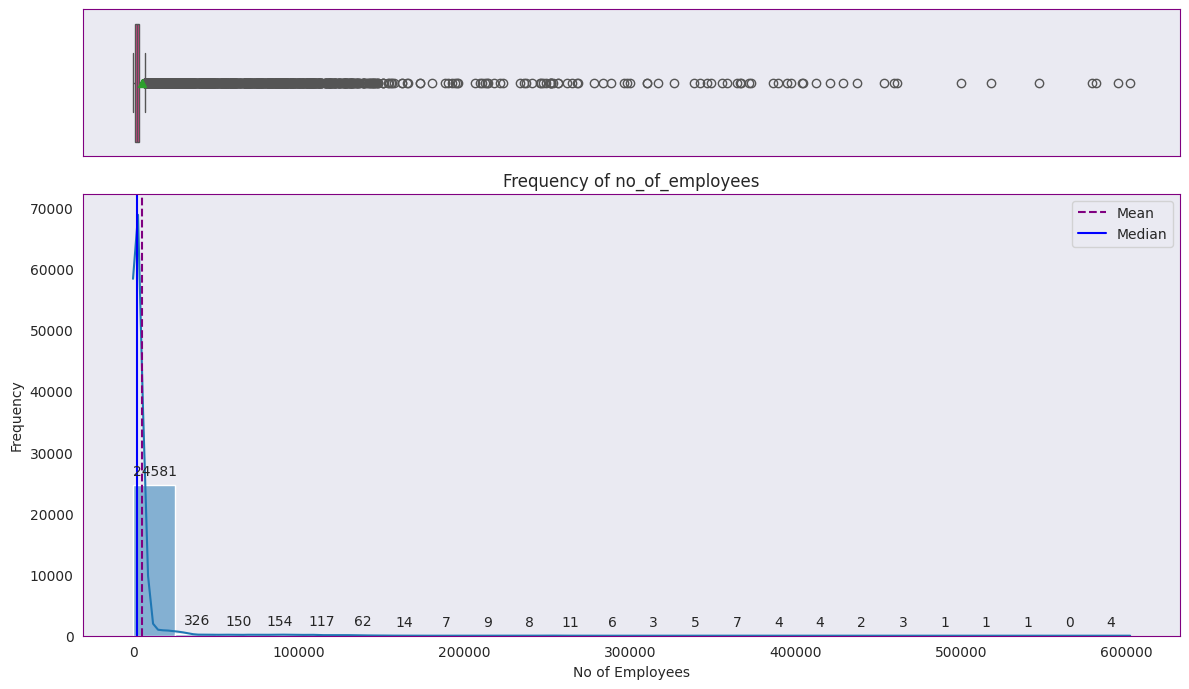

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_employees")

# Set the x-axis label
plt.xlabel("No of Employees")

df2["no_of_employees"].value_counts()
print()
df2["no_of_employees"].describe().T

No_of_employees is right skewed. <br>
Average no_of_employees is 5667 <br>
A count of ~25,211 is less than 100,000 no of employees. <br>
There are several outliers.

#### Observations on prevailing_wage

<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'Prevailing Wage')

prevailing_wage
82560.28     2
122.65       2
60948.15     2
64357.58     2
108.12       2
            ..
25713.98     1
101656.64    1
65665.55     1
50.88        1
70876.91     1
Name: count, Length: 25454, dtype: int64

count    25480.00
mean     74455.81
std      52815.94
min          2.14
25%      34015.48
50%      70308.21
75%     107735.51
max     319210.27
Name: prevailing_wage, dtype: float64

<Figure size 2000x600 with 0 Axes>

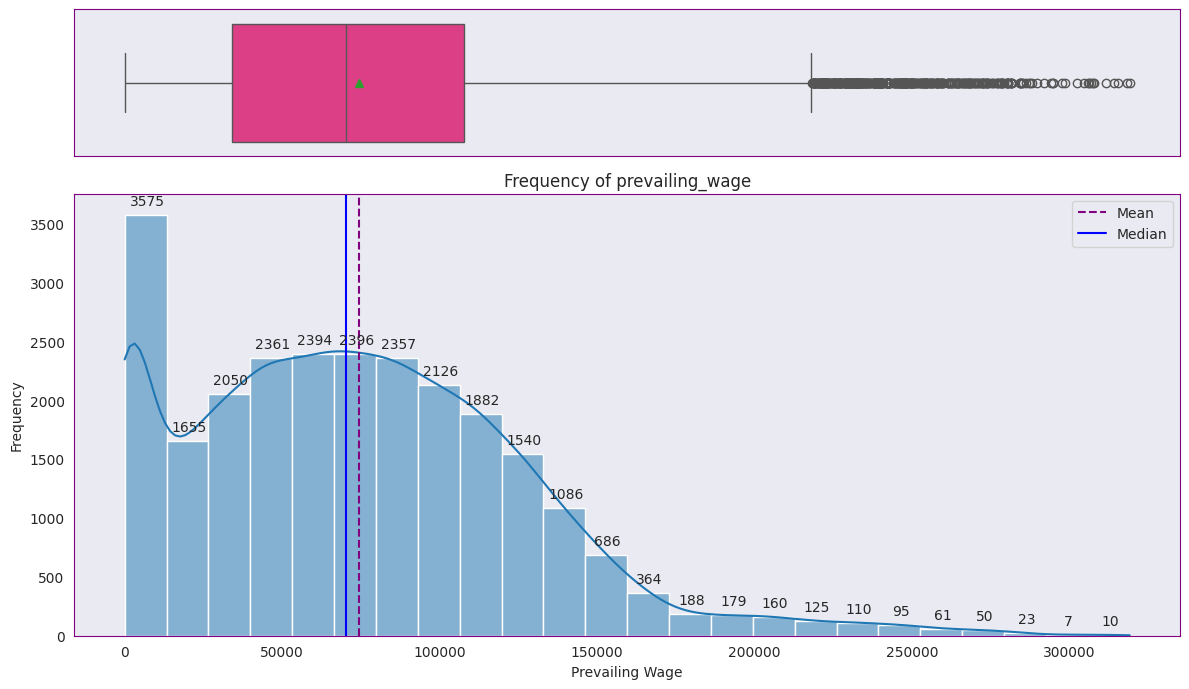

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "prevailing_wage")

# Set the x-axis label
plt.xlabel("Prevailing Wage")

df2["prevailing_wage"].value_counts()
print()
df2["prevailing_wage"].describe().T

The mean and median are both between 70-75K. <br>
There are several outliers.

#### Observations on continent

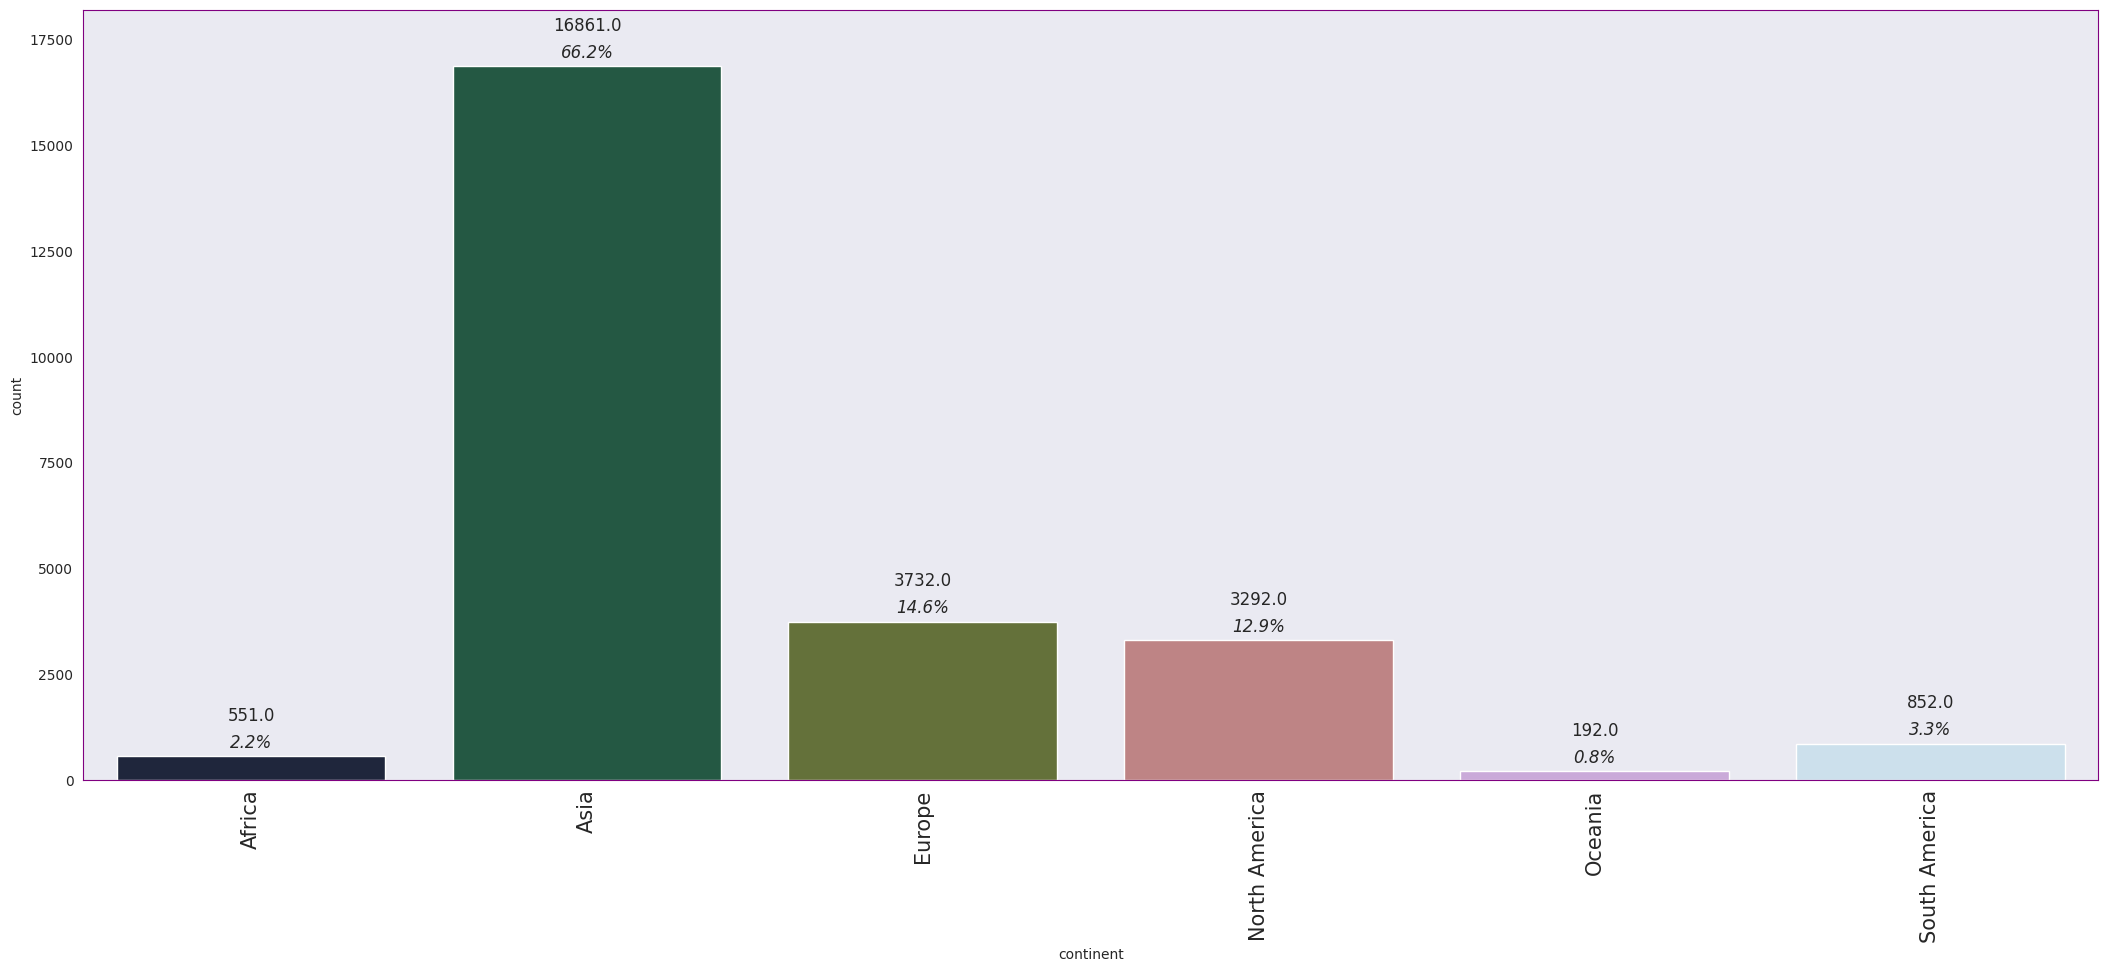

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "continent", order=None, perc=True, n=25)

Most of the applicants are coming from Asia at 66.2%.
Order of applicant's continent:
1. Asia 66.2%
2. Europe 14.6%
3. North America 12.9%
4. South America 3.3%
5. Africa 2.2%
6. Oceania 0.8%


#### Observations on education_of_employee

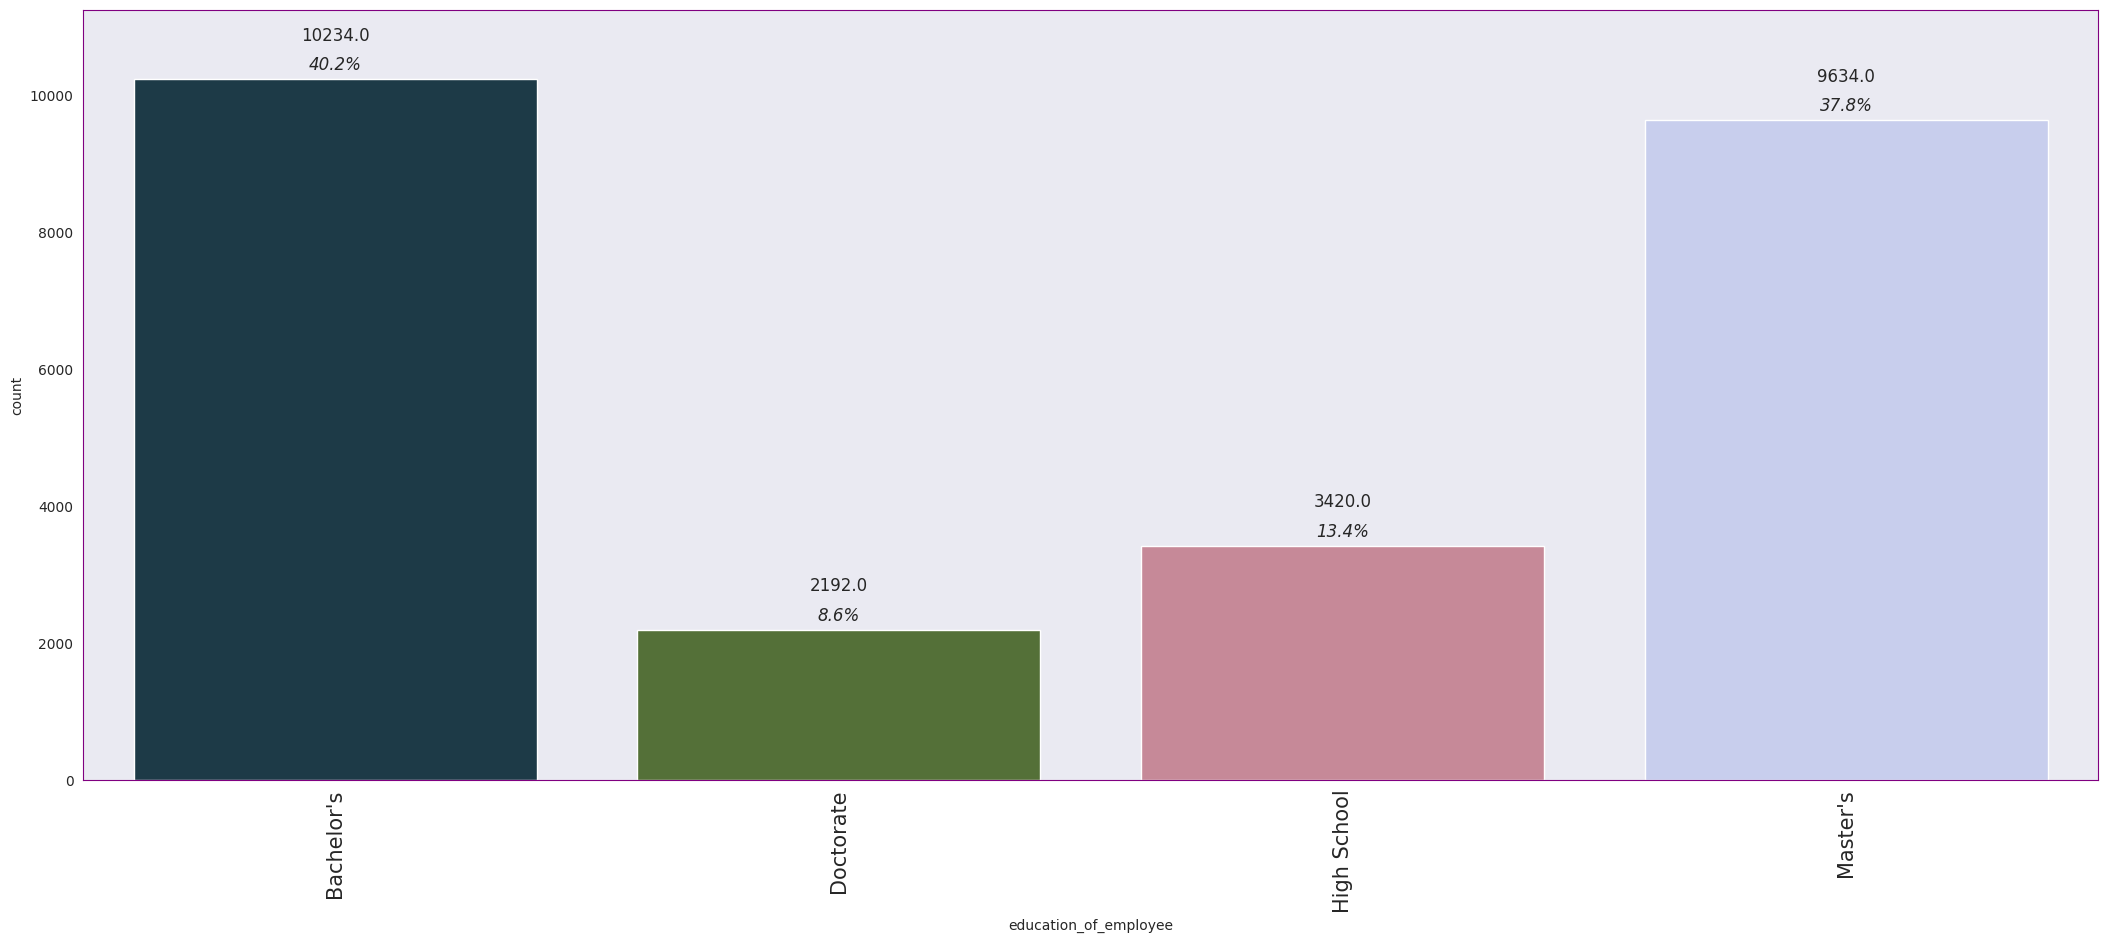

In [ ]:
# Labeled barplot for type of education of employee
labeled_barplot(df2, "education_of_employee", order=["High School","Bachelor's","Master's","Doctorate"], perc=True, n=25)


40.2 % of applicants have a Bachelor's degree.<br>
37.8% of applicants have a Master's degree. <br>
13.4% of applicants only have a high school diploma. <br>
8.6% of applicants have their Doctorate.<br>

#### Observations on has_job_experience

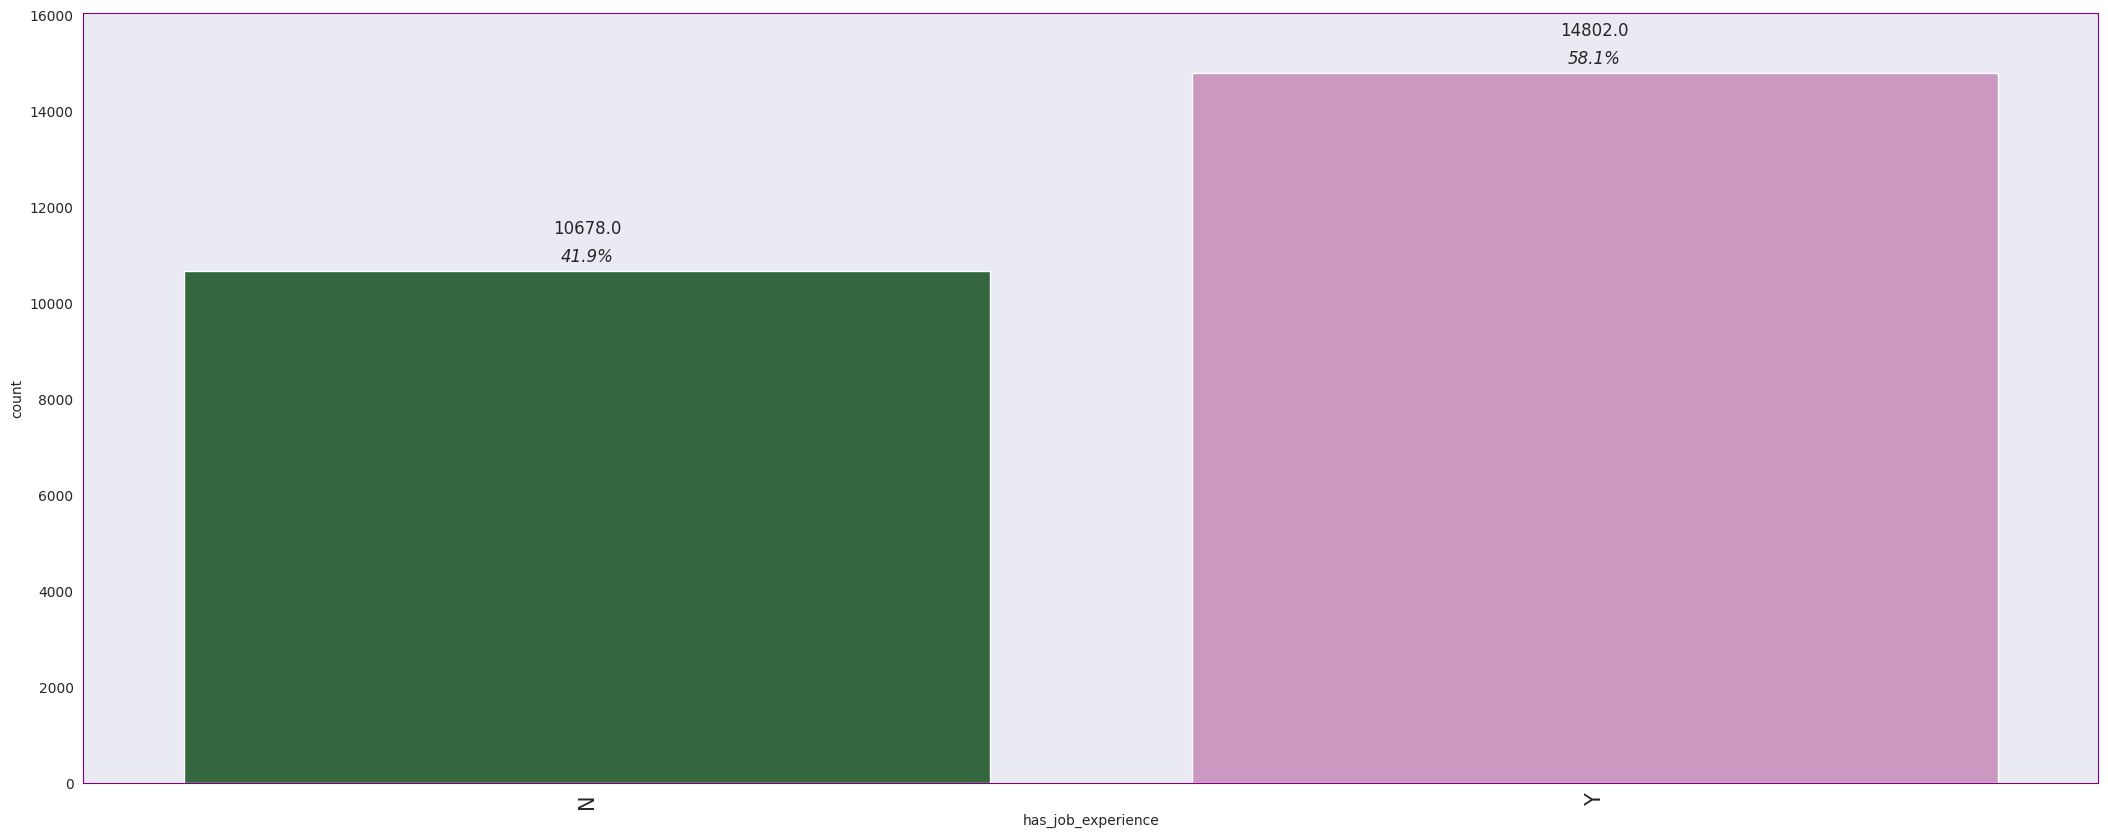

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "has_job_experience", order = None, perc=True, n=25)

58.1% of applicants have job experience, whereas 41.9% do not have job experience.

#### Observations on requires_job_training

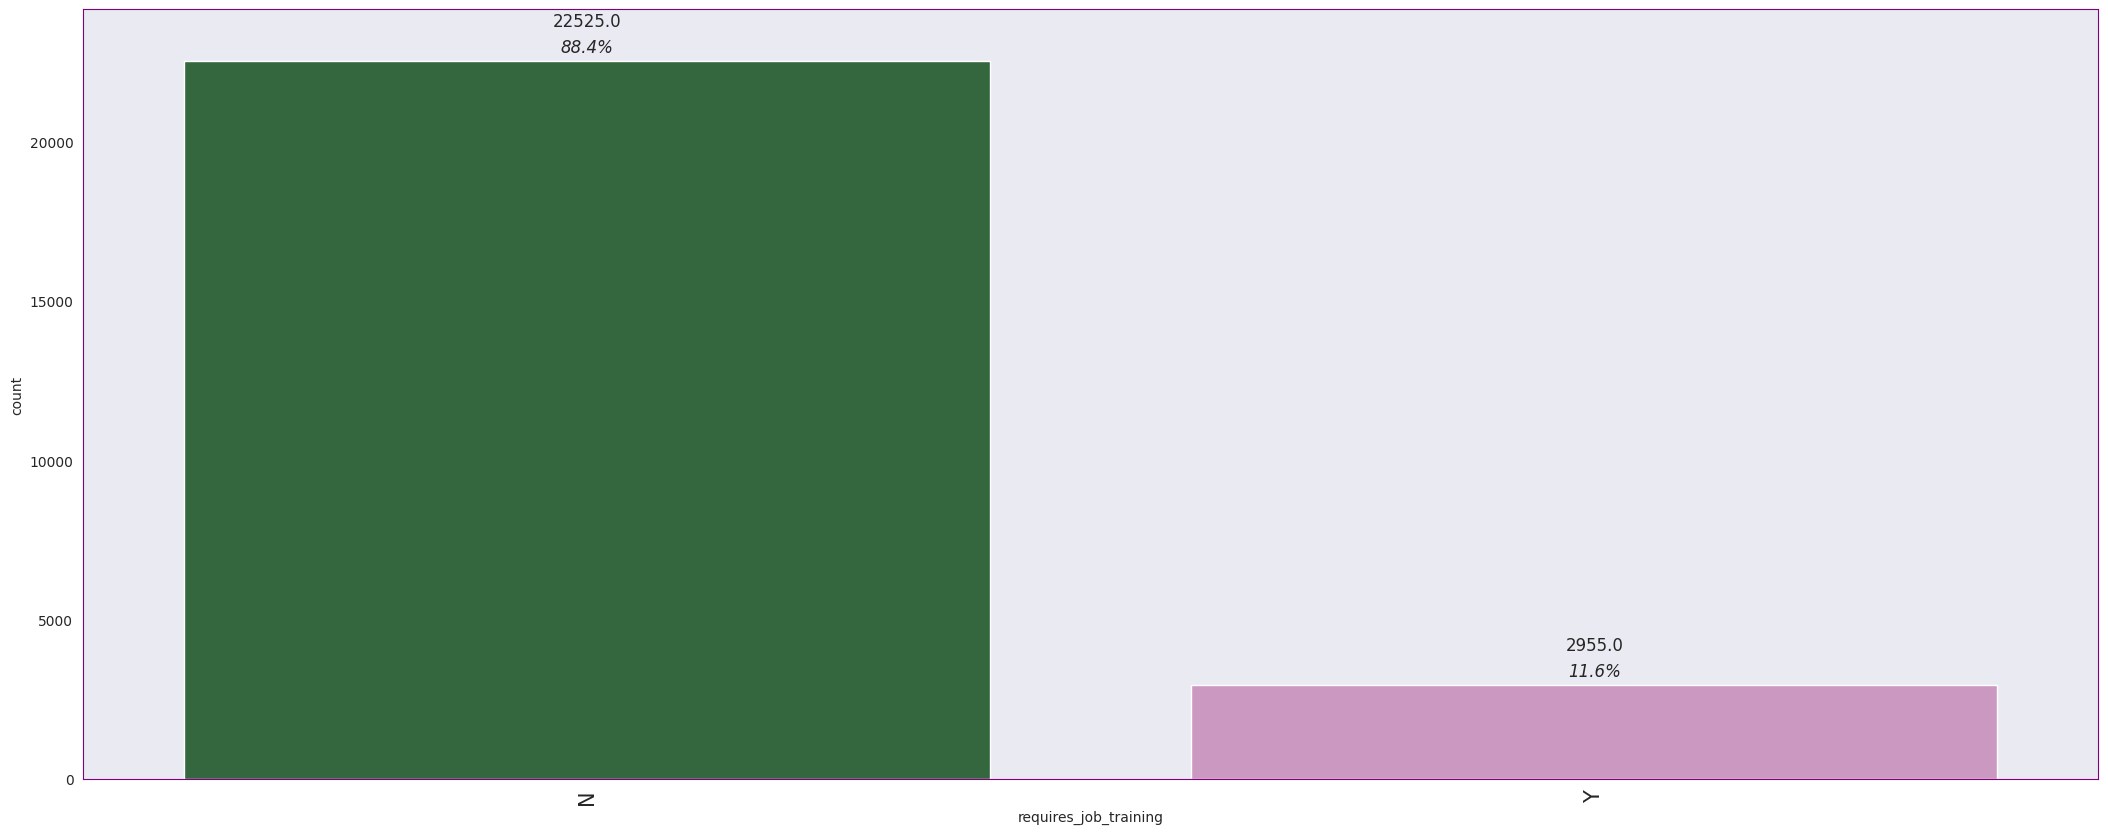

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "requires_job_training", order=None, perc=True, n=25)

88.4% of applicants do not require job training. <br>
11.6% of the applicants will need job training

#### Observations on yr_of_estab

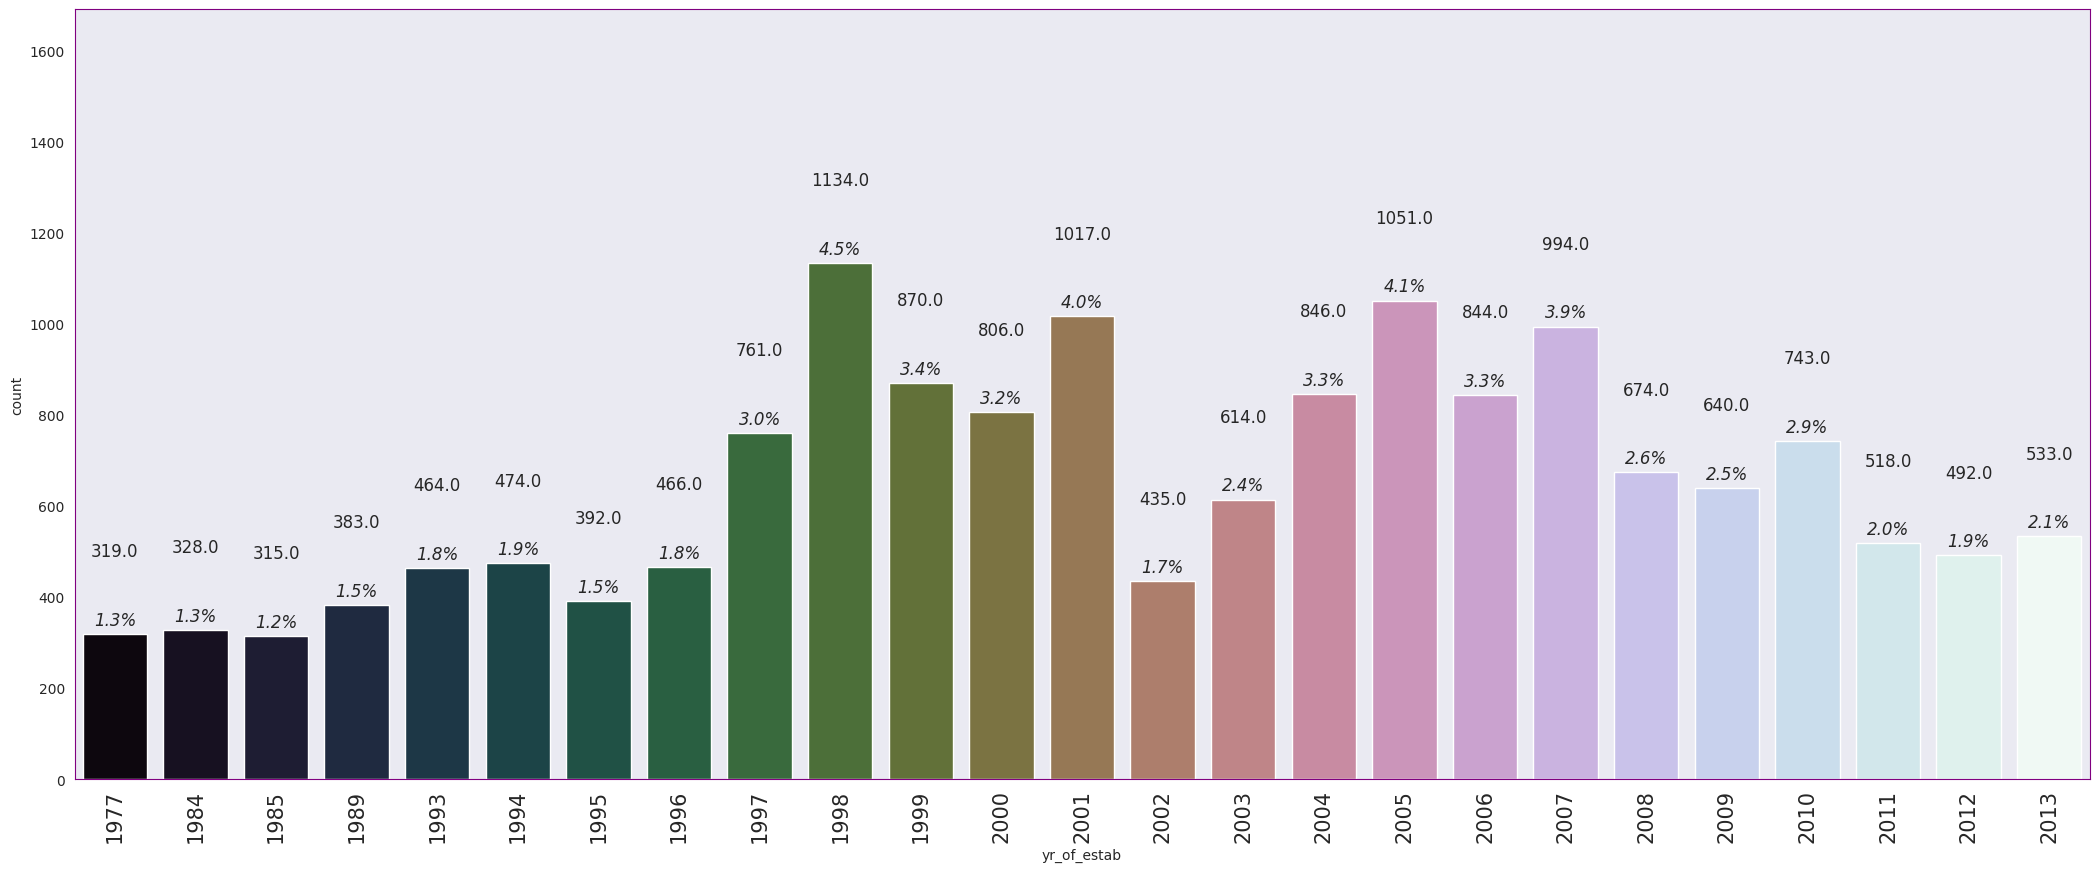

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "yr_of_estab", order=None, perc=True, n=25)

Graph is showing the top 25. <br>
1998 has the highest amount of companies that were started that year, however the rate is only 4.5% of the companies. <br>
There are several companies on several of the years. <br>
Not sure the age of the company really makes a difference based on the graph. <br>
Will consider dropping this feature.

#### Observations on region_of_employment

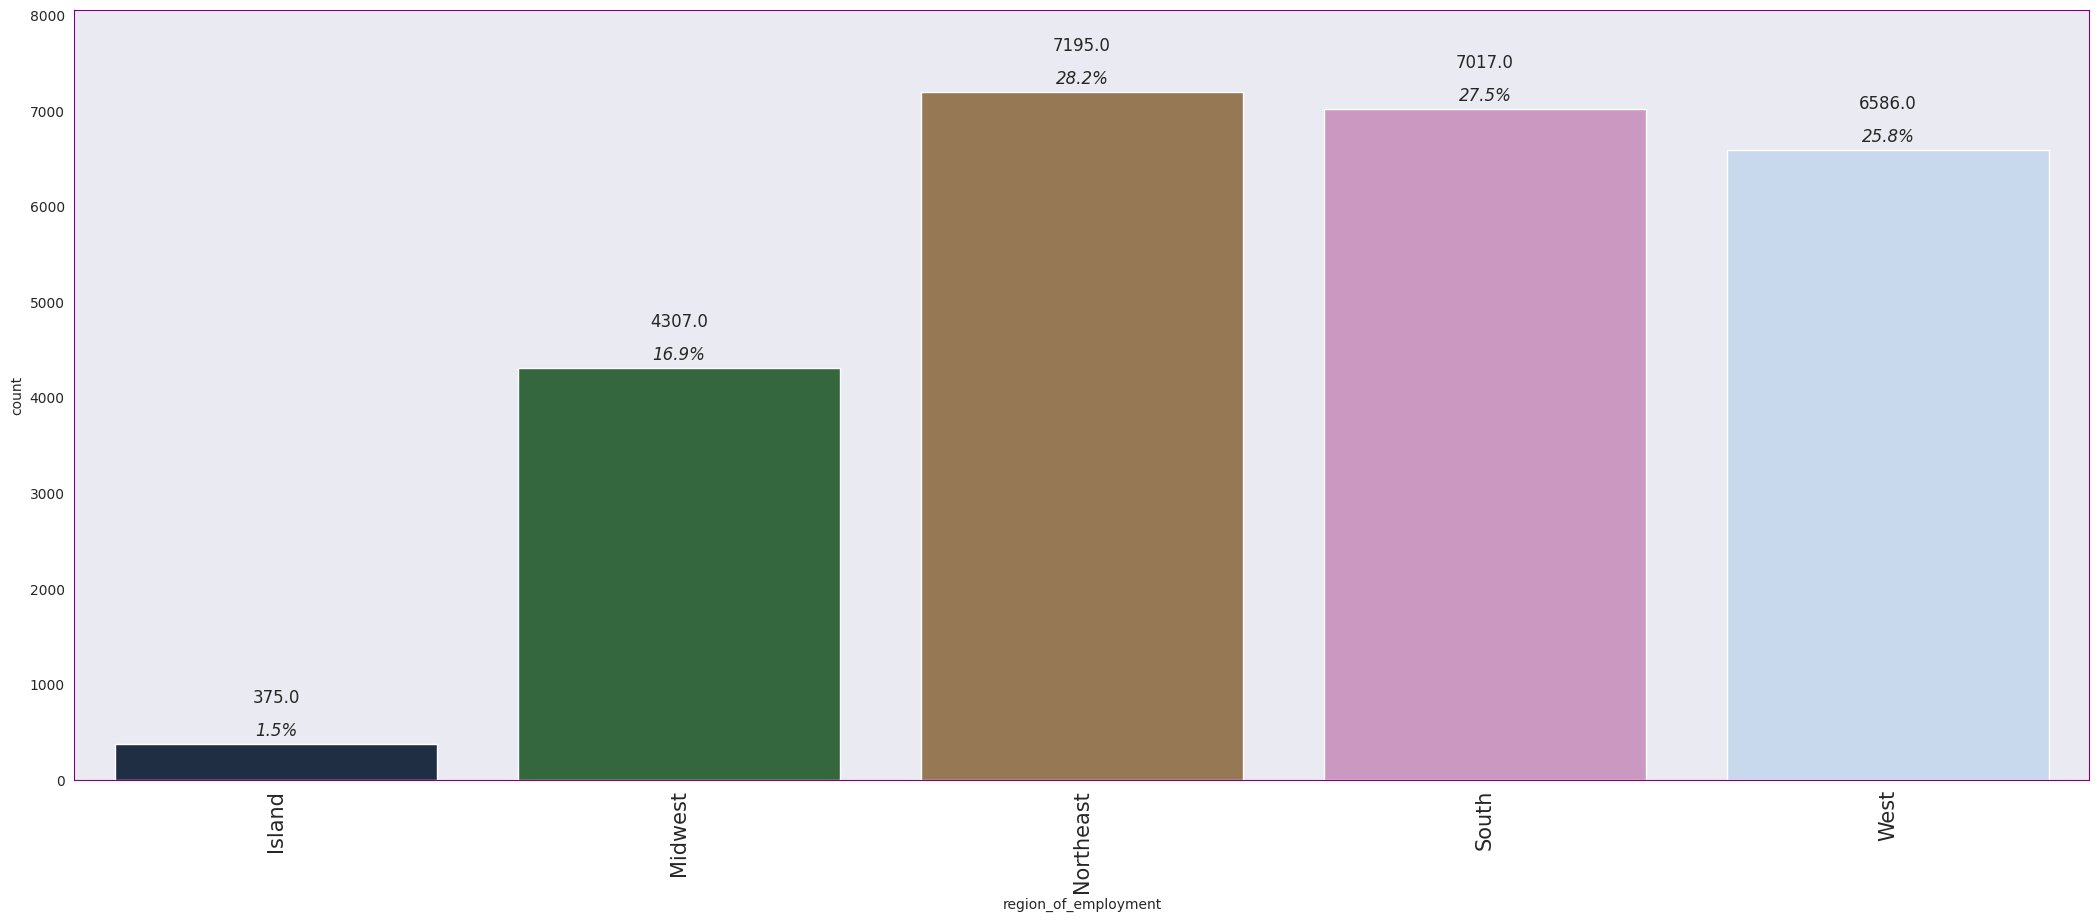

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "region_of_employment", order=None, perc=True, n=25)

There is not a huge difference between the top 3 regions.
1. Northeast 28.2%
2. South 27.5%
3. West 25.8%

The bottom 2 regions account for 18.4% of all the jobs regions.
4. Midwest 16.9%
5. Island 1.5%

#### Observations on unit_of_wage

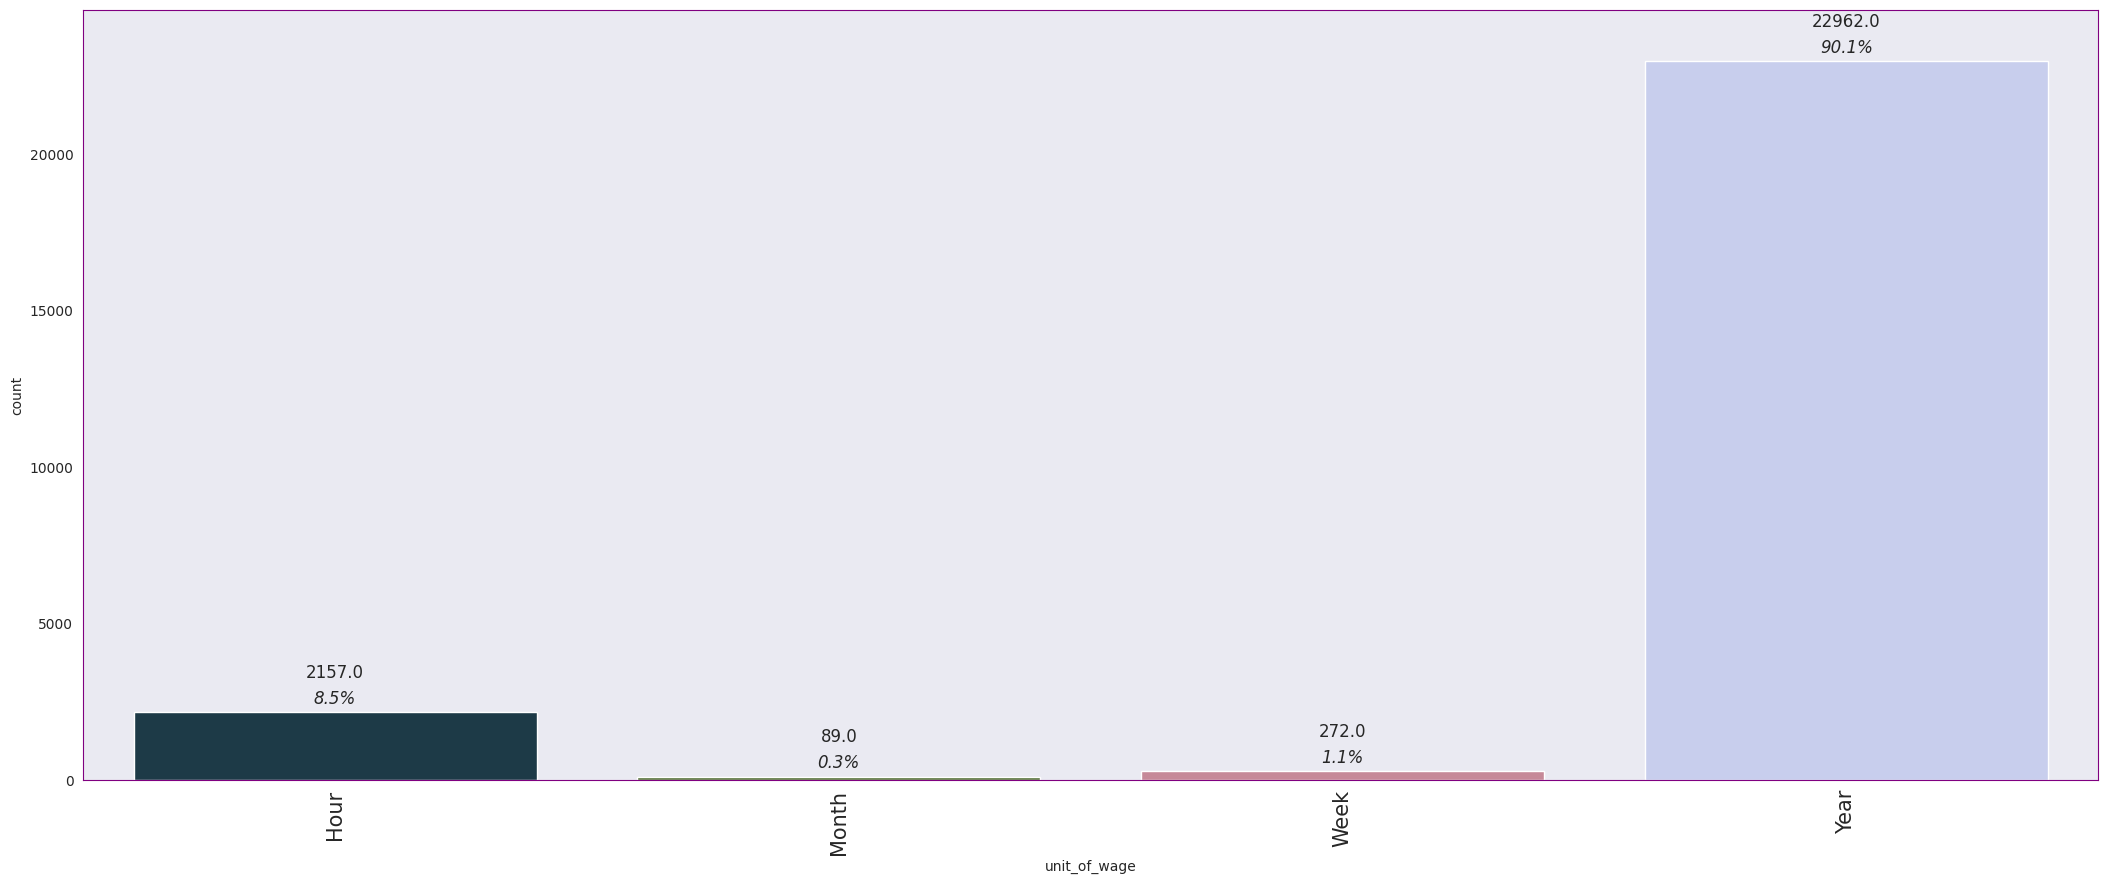

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "unit_of_wage", order=None, perc=True, n=25)

Most jobs have an annual salary, 90.1% <br>
8.5% are hourly jobs. <br>
Weekly plus Monthly jobs salaries only account for 1.4% of all jobs.

#### Observations on full_time_position

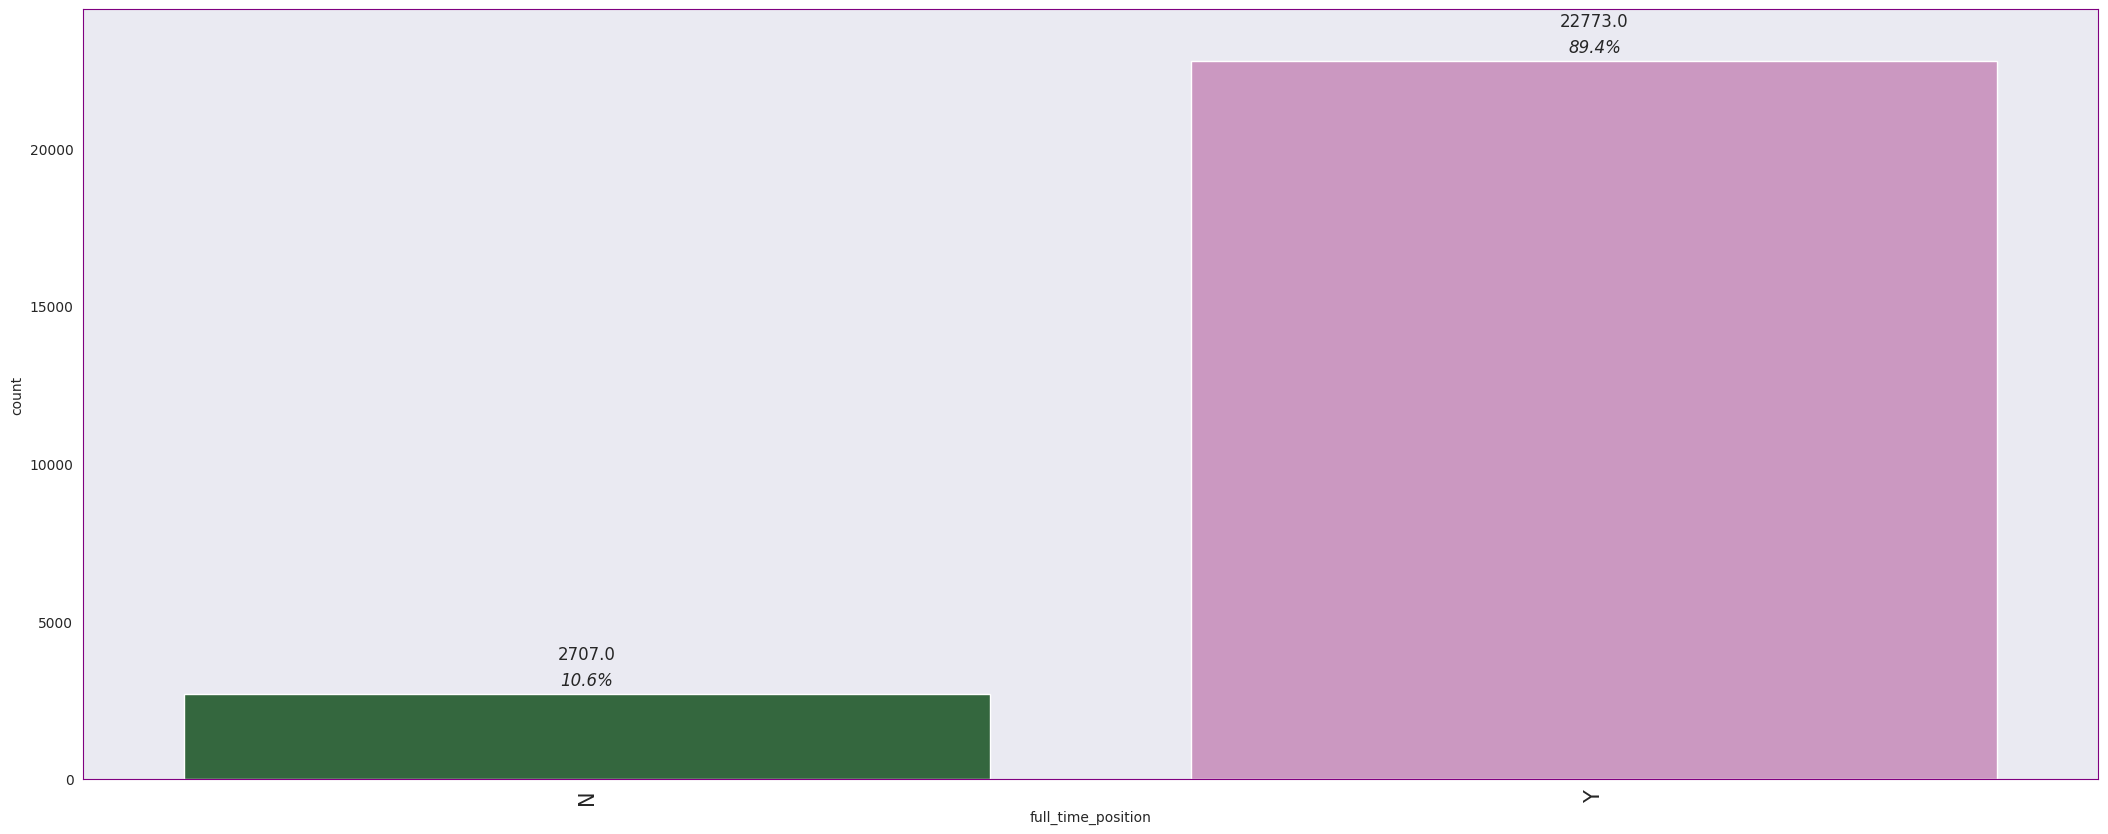

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "full_time_position", order=None, perc=True, n=25)

Most of the jobs are full time positions. <br>
Full time jobs account for 89.4%, whereas non full time jobs only account for 10.6%.

#### Observations on case_status

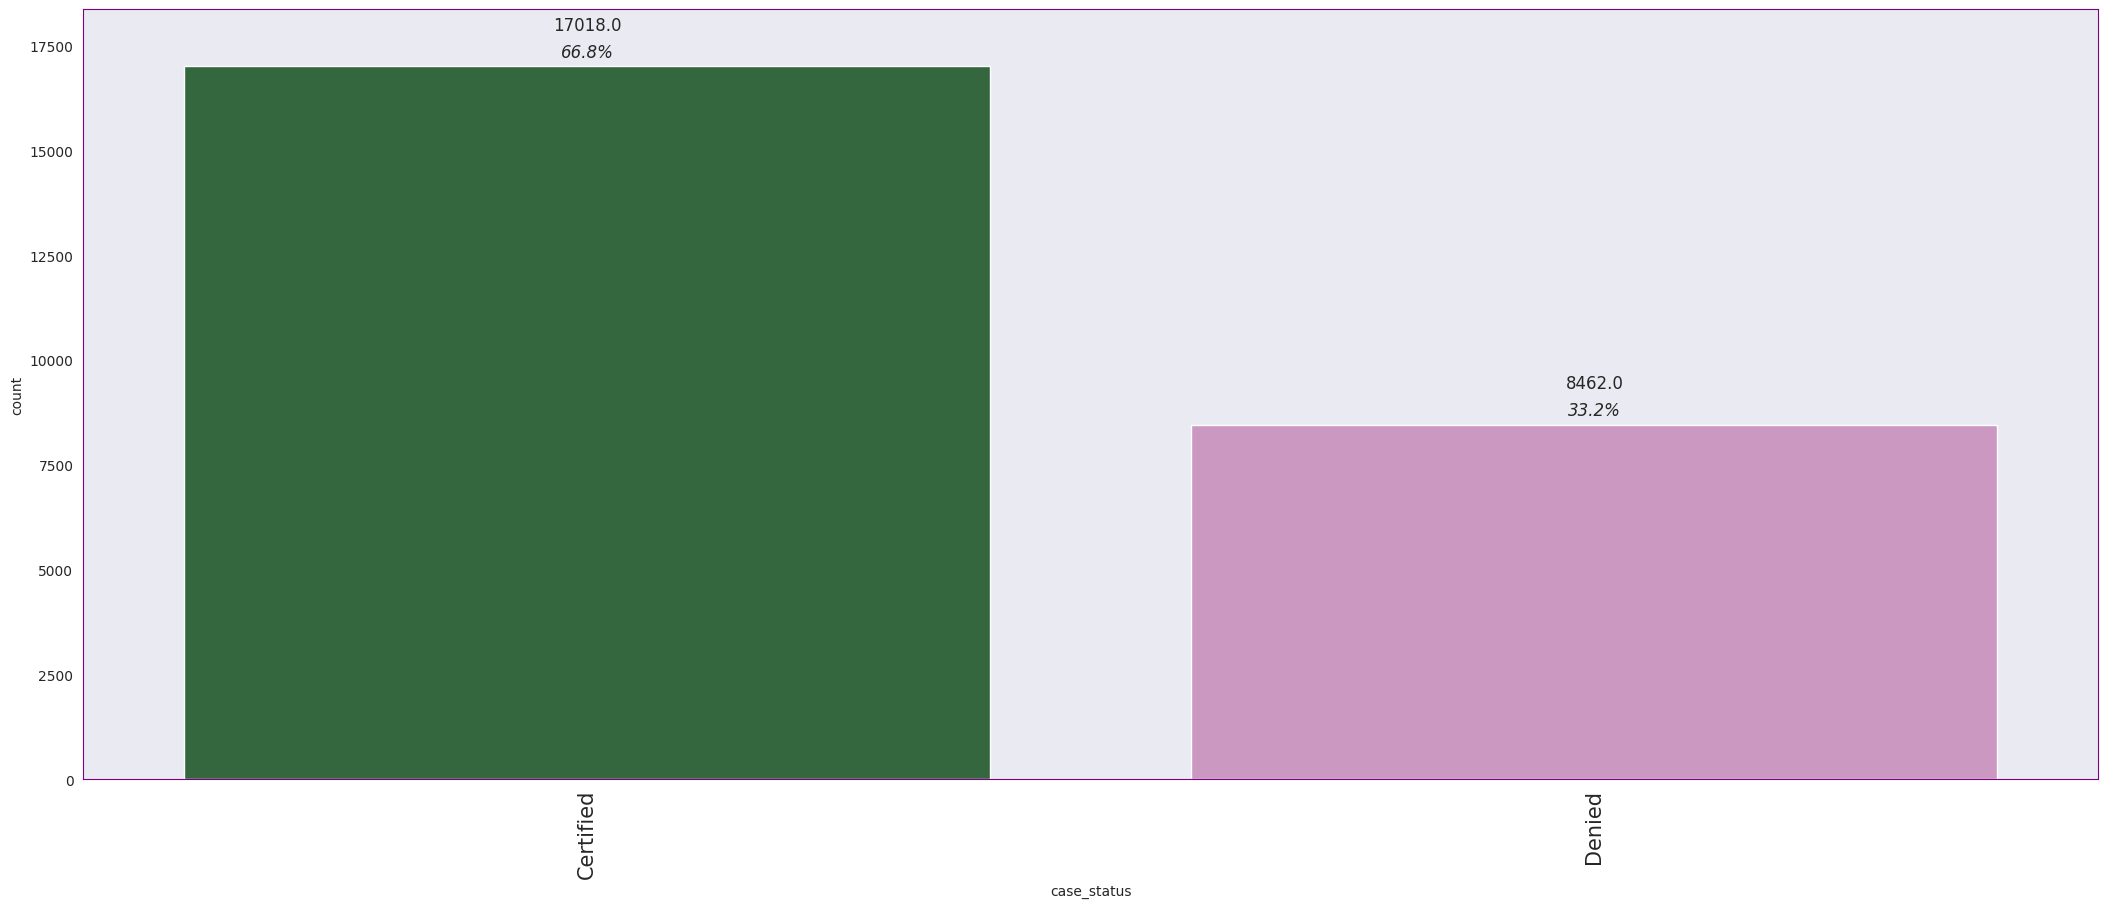

In [ ]:
# Labeled barplot for type of meal plan
labeled_barplot(df2, "case_status", order=None, perc=True, n=25)

Certified Visa's account for 66.8% of all applications. <br>
Denied Visa's account for 33.2% of all applications

### Bivariate Analysis

#### Correlation check

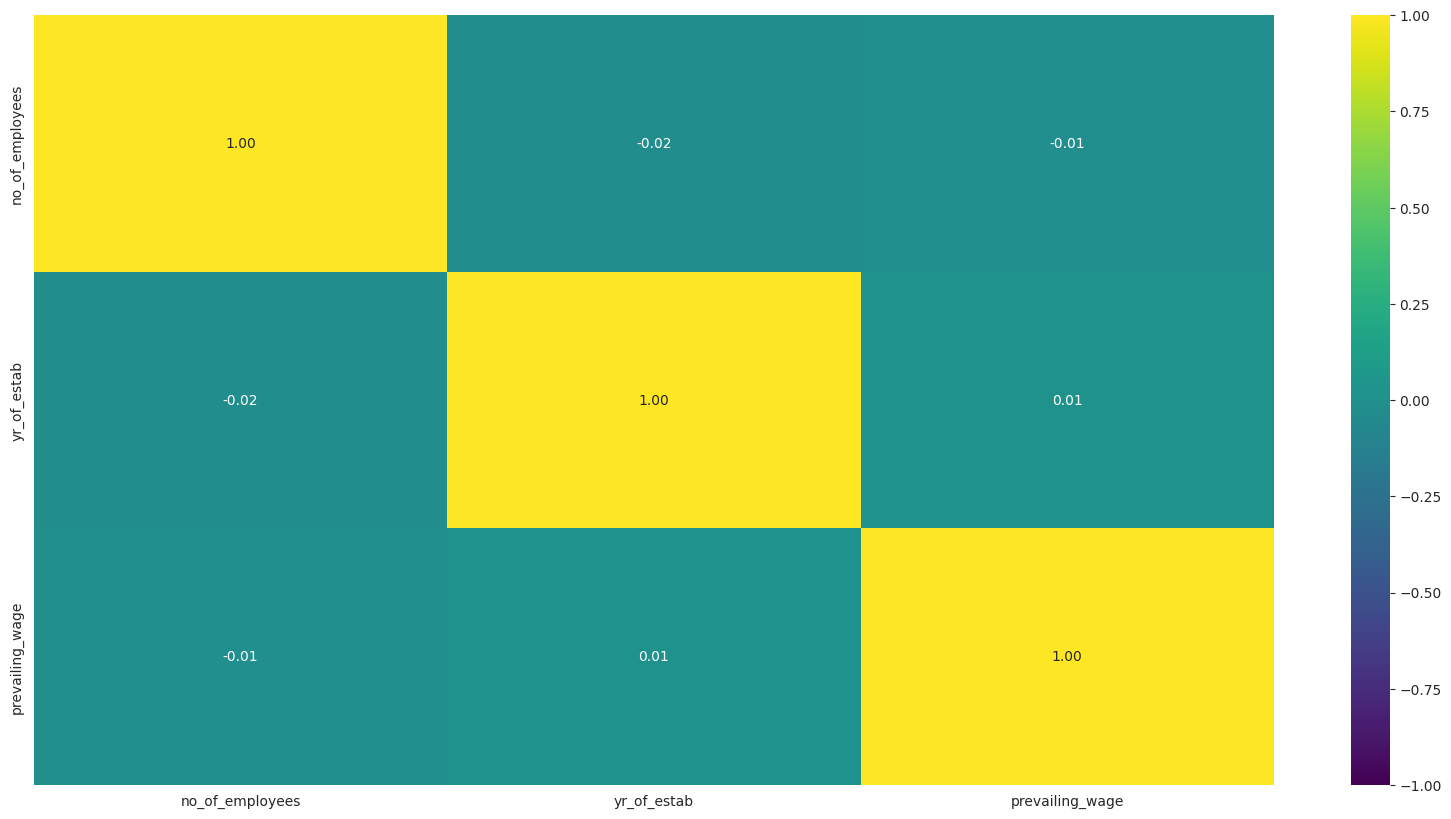

In [ ]:
plt.figure(figsize=(20,10))
#sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
#plt.show()

# Select only numeric columns
numeric_data = df2.select_dtypes(include=[float, int])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap="viridis")
plt.show();

There are no correlations between any of the fields.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


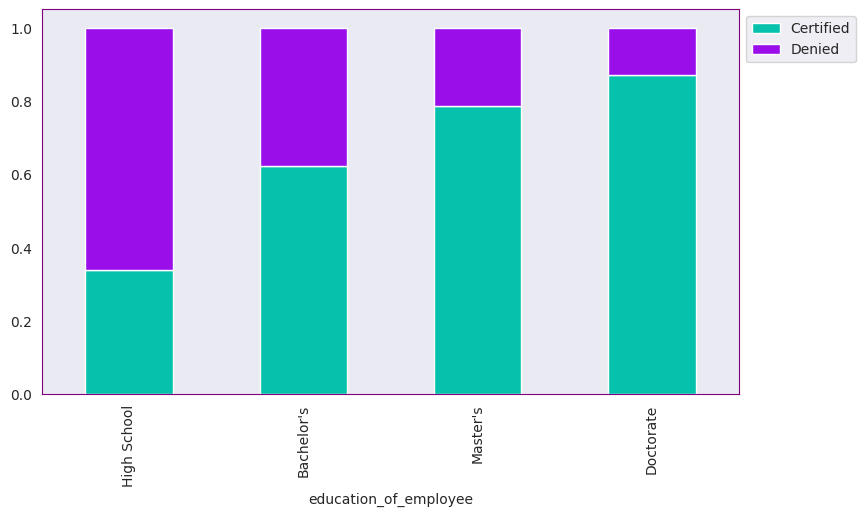

In [ ]:
stacked_barplot(df2, "education_of_employee", "case_status")

Applicants having a Doctorate have the highest certified rate. Doctorate applications are certified 87.23% of the time and denied 12.77% of the time. <br>
Applicants who have a Masters are certified 78.63% of the time and denied 21.37% of the time. <br>
Applicants who have a Bachelors are certified 62.21% of the time and denied 37.79% of the time. <br>
Applicants who only have a high school diploma are denied more than they are certified. They are certified 34.04% of the time and denied 65.96% of the time.


**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

Education does play a role in Visa Certification. <br>

Doctorate   - 87.23% <br>
Masters     - 78.63% <br>
Bachelors   - 62.21% <br>
High School - 34.04% <br>


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


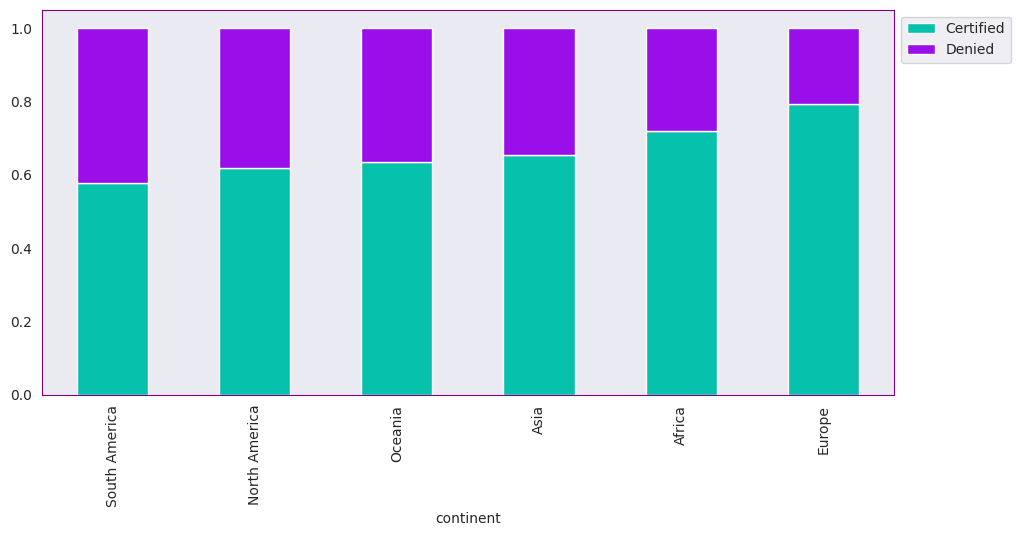

In [ ]:
stacked_barplot(df2, "continent", "case_status")

Asia has the highest amount of applicants at 16,861. Of those, only 72.05% of applications are certified, 27.95% are denied. <br>
The highest rate for Certified for a continent is with Europe. Of all applications, 79.23% are certified and 20.77% are denied. <br>
South American has the highest rate of denials. Of all applications, 57.86% are approved and 42.14% are denied. <br>


**2. How does the visa status vary across different continents?**

Certified rates accross all continents range from 57.86% to 72.05%, whereas denial rates range from 20.77% to 42.14%. <br>

Africa - Certified 72.05%  Denied 27.95% <br>
Asia   - Certified 65.31%  Denied 34.69% <br>
Europe - Certified 79.23%  Denied 20.77% <br>
North America - Certified 61.88% Denied 38.12% <br>
Oceania - Certified 63.54% Denied 36.46% <br>
South America - Certified 57.86% Denied 42.14% <br>


case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


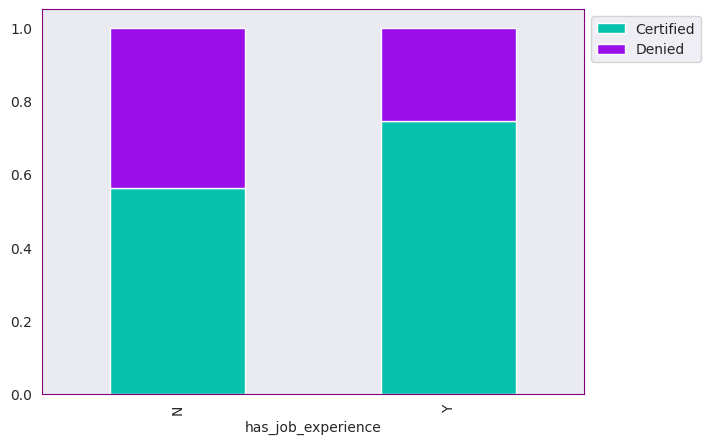

In [ ]:
stacked_barplot(df2, "has_job_experience", "case_status")

There is a higher chance of being certified if you have job experience. <br>
If the applicant has job experience they are certified 74.48% and denied 25.52%.<br>
If the applicant has no job experience they are certified 56.13% and denied 43.87%.

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

Having working experience does seem to have a small impact on Visa Status.<br>

Have Job Experience - Certified 74.48% Denied 25.52% <br>
No Job Experience - Certified 56.13% Denied 43.87%

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


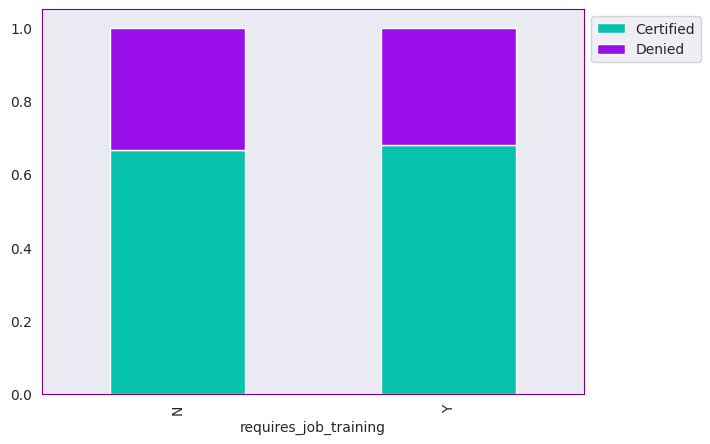

In [ ]:
stacked_barplot(df2, "requires_job_training", "case_status")

Whether or not training is required does not seem to make a difference. <br>

No training needed - Certified 66.65% Denied 33.35% <br>
Training required  - Certified 67.88% Denied 32.12% <br>

Considering dropping this column since it has little impact on the target variable.


case_status  Certified  Denied    All
yr_of_estab                          
All              17018    8462  25480
1998               736     398   1134
2001               656     361   1017
2005               719     332   1051
2007               682     312    994
1999               567     303    870
2000               521     285    806
2004               572     274    846
1997               512     249    761
2006               610     234    844
2010               522     221    743
2003               394     220    614
2009               433     207    640
2008               487     187    674
1993               287     177    464
1994               309     165    474
2012               329     163    492
2011               360     158    518
2013               379     154    533
2002               286     149    435
1996               320     146    466
1995               251     141    392
1989               258     125    383
1984               212     116    328
1985        

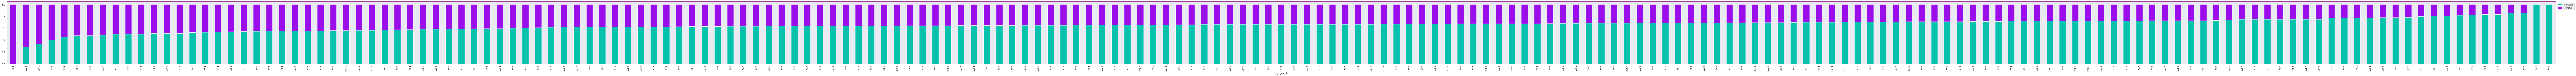

In [ ]:
stacked_barplot(df2, "yr_of_estab", "case_status")

Certified range from 0-100%, Denied range from 0 to 100%. <br>
The age of the establishment does not appear to make any difference in whether or not they are certified. <br>
The oldest company has a Certified rate of 69% and Denied rate of 31%, whereas the newest company has a Certified rate of 57% and Denied rate of 43%. <br>
Considering removing this feature.

In [ ]:
#Create a yr_of_estab count range
df2["yr_of_estab_range"] = pd.cut(
    x=df2.yr_of_estab,
    bins=[-np.infty, 1873, 1923, 1973, 2003, np.infty],
    labels=["Over 150 yrs", "100-149 yrs", "50-99 yrs", "20-49 yrs", "Less than 20 yrs"],
)

df2["yr_of_estab_range"].value_counts() # creating the yr_of_estab category based on the year values


yr_of_estab_range
20-49 yrs           11829
Less than 20 yrs     7597
50-99 yrs            3117
100-149 yrs          1597
Over 150 yrs         1340
Name: count, dtype: int64

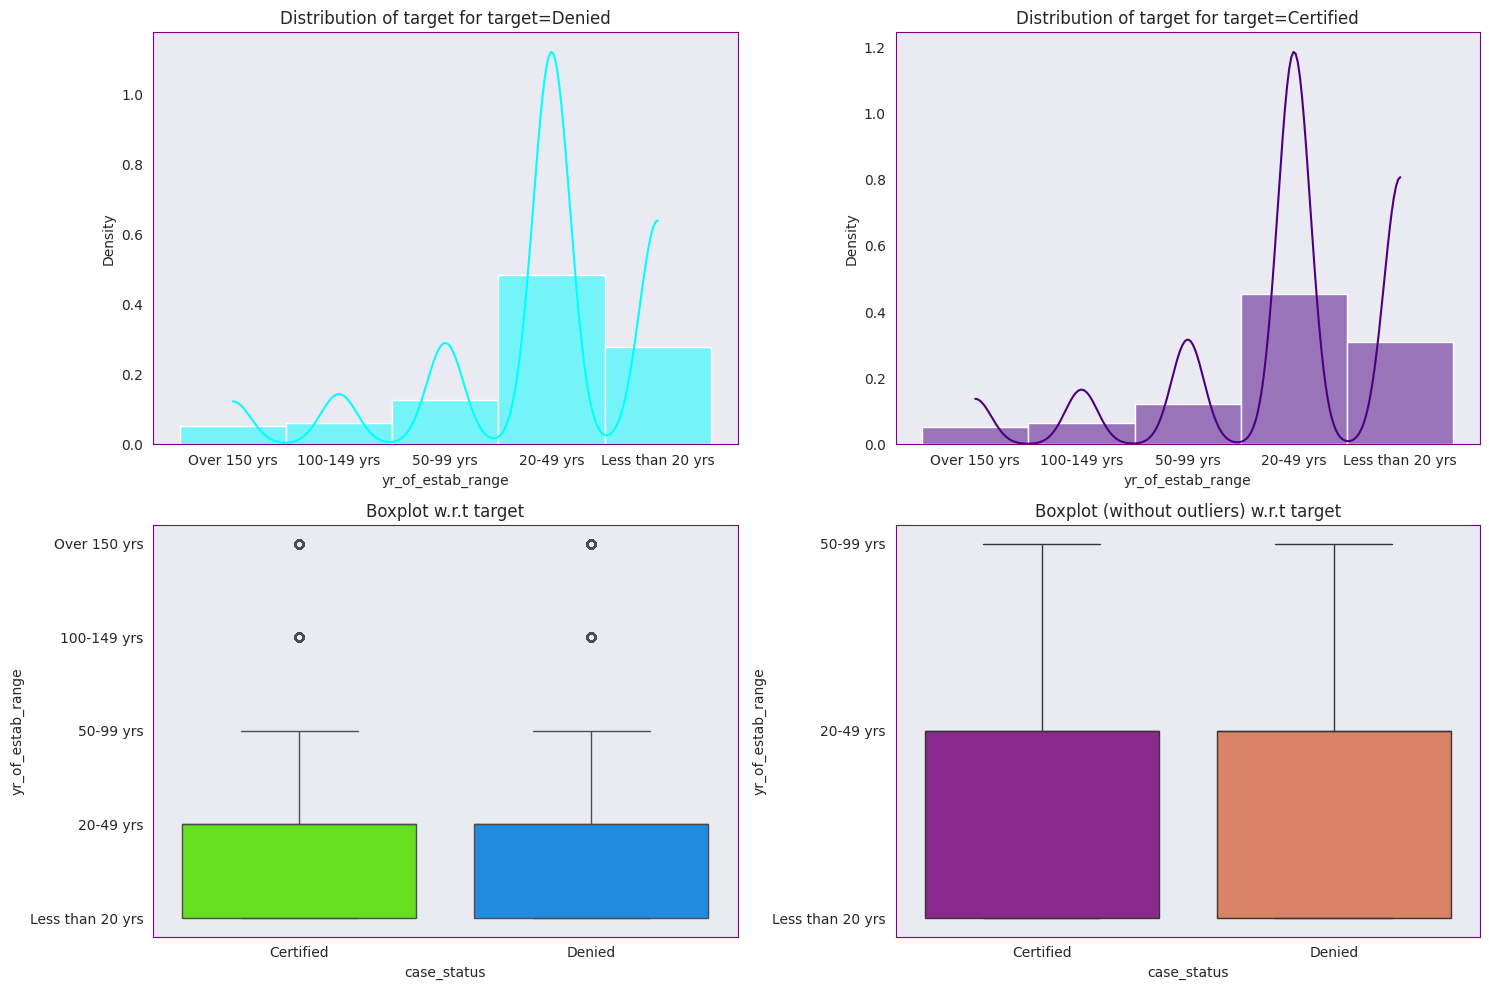

In [ ]:
distribution_plot_wrt_target(df2, "yr_of_estab_range", "case_status")

case_status        Certified  Denied    All
yr_of_estab_range                          
All                    17018    8462  25480
20-49 yrs               7731    4098  11829
Less than 20 yrs        5260    2337   7597
50-99 yrs               2060    1057   3117
100-149 yrs             1074     523   1597
Over 150 yrs             893     447   1340
------------------------------------------------------------------------------------------------------------------------


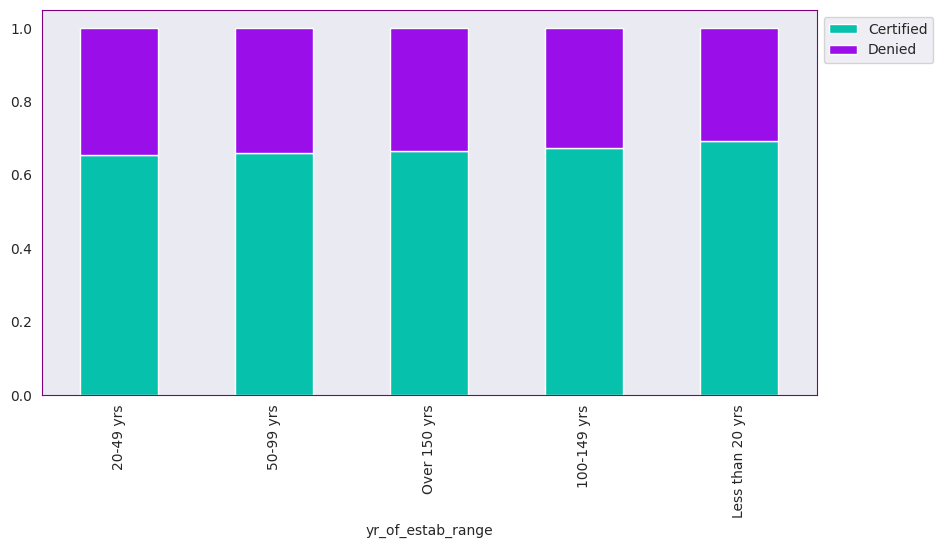

In [ ]:
stacked_barplot(df2, "yr_of_estab_range", "case_status")

Less than 20 yrs - Certified 69.24% Denied 30.76% <br>
20-49 yrs - Certified 65.36% Denied 34.64% <br>
50-99 yrs - Certified 66.09% Denied 33.91% <br>
100-149 yrs - Certified 67.25% Denied 32.75% <br>
Over 150 yrs - Certified 66.64% Denied 33.36%.

There is not much difference between certification rates. <br>
Highest certification range to lowest certification rate is only a difference of 3.88%.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


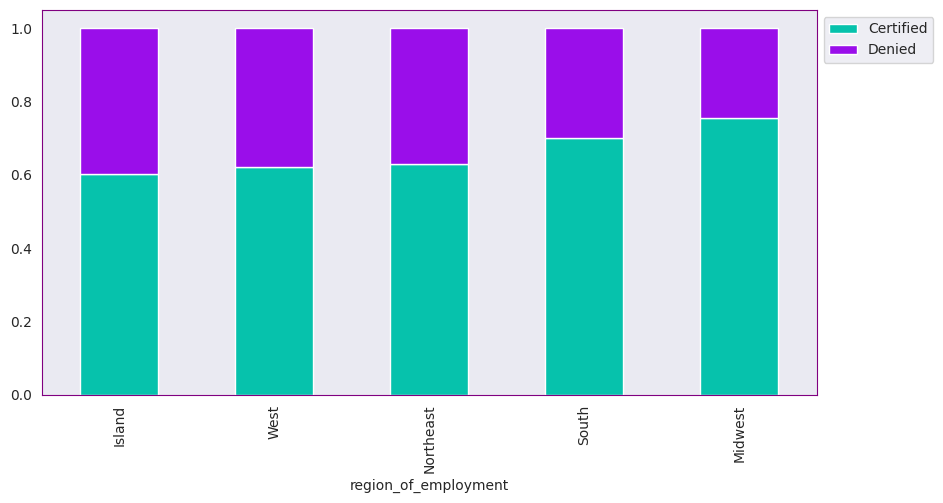

In [ ]:
stacked_barplot(df2, "region_of_employment", "case_status")

The region does not seem to have much impact in whether or not the Visa is certified. <br>
Certified rates range from 60 to 76% and Denied range from 24% to 40%. <br>
Island has the lowest Certified rate at 60%, and Midwest has the highest rate at 76%.<br>
This is another feature considering removing since it has little if any impact on whether or not certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


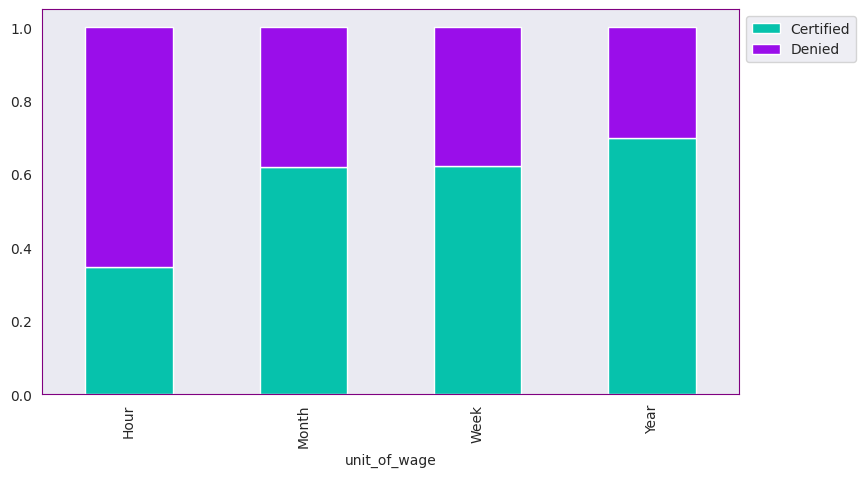

In [ ]:
stacked_barplot(df2, "unit_of_wage", "case_status")

Hourly wage has the lowest certified rate of 35%. Their denied rate is 65%. <br>
Yearly wage has the highest certified raate of 70%. Their denied rate is 30%. <br>
Monthly and weekly rate have the same certified rate of 62%. Their denied rate is 38%.

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

Yearly paid employees are the most likely to be certified for a Visa. Their certification rate is 70%.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


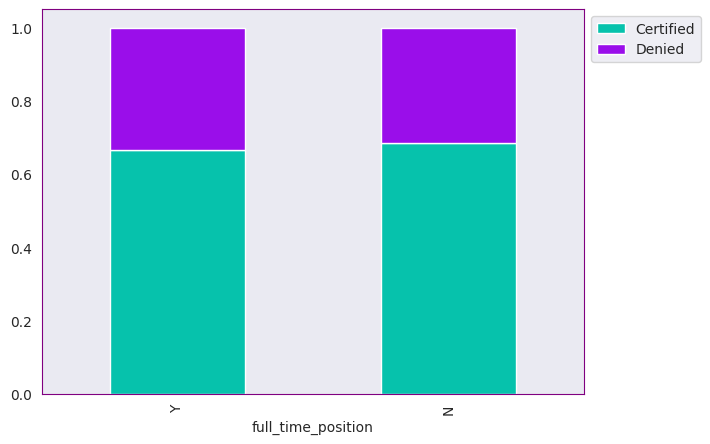

In [ ]:
stacked_barplot(df2, "full_time_position", "case_status")

Whether or not the position is full time or not does not seem to impact whether or not the Visa is certified. <br>
Full time position - Certified 67%  Denied 33%. <br>
Not full time position - Certified 69% Denied 31%. <br>
This is another feature to consider dropping.

In [ ]:
# Create the 'pay_term' column
df2['pay_term'] = np.where(df2['unit_of_wage'] == 'Hour', 'Day', 'Annual')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
 11  yr_of_estab_range      25480 non-null  category
 12  pay_term               25480 non-null  object  
dtypes: category(9), float64(1), int64(2), object(1)
memory usage: 1021.8+ KB


In [ ]:
#The data shows that the unit_of_wage 'Hour' is a per-day amount, whearas the other three unit_of_wage categories are an annual salary amount.

# Define conversion factors
CONVERSION_FACTORS = {
    'Hour': 260,   # 260 weekdays (assuming 5 days per week), some employees will work less than this, would need amount of hours worked to better cAlculate a yearly amount
    'Week': 1,     # already annual
    'Month': 1,    # already annual
    'Year': 1       # already annual
}

# Function to convert wage to annual salary
def convert_to_annual(row):
    wage = row['prevailing_wage']
    unit = row['unit_of_wage']
    return wage * CONVERSION_FACTORS[unit]

# Apply the conversion function
df2['annual_wage'] = df2.apply(convert_to_annual,axis=1)


In [ ]:
#Create a employee count range
df2["annual_wage_range"] = pd.cut(
    x=df2.annual_wage,
    bins=[-np.infty, 50000, 100000, 150000,np.infty],
    labels=["Below 50K", "50K - 100K", "100K to 150K", "Above 150K"],
)

df2["annual_wage_range"].value_counts() # creating the annual wage category based on the wage values

annual_wage_range
50K - 100K      9284
Below 50K       7578
100K to 150K    6135
Above 150K      2483
Name: count, dtype: int64

In [ ]:
df2[df2["unit_of_wage"]=="Hour"]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yr_of_estab_range,pay_term,annual_wage,annual_wage_range
0,Asia,High School,N,N,14513,2007,West,592.20,Hour,Y,Denied,Less than 20 yrs,Day,153972.75,Above 150K
7,North America,Bachelor's,Y,N,3035,1924,West,418.23,Hour,Y,Denied,50-99 yrs,Day,108739.75,100K to 150K
54,Asia,Master's,Y,N,11733,1995,Northeast,230.81,Hour,Y,Certified,20-49 yrs,Day,60009.87,50K - 100K
62,Asia,High School,N,N,5110,2004,West,103.22,Hour,Y,Denied,Less than 20 yrs,Day,26837.62,Below 50K
70,Asia,High School,Y,N,1320,2001,Northeast,230.33,Hour,Y,Denied,20-49 yrs,Day,59885.02,50K - 100K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25444,South America,Master's,Y,N,1081,1838,Northeast,156.61,Hour,Y,Certified,Over 150 yrs,Day,40717.82,Below 50K
25450,Asia,Bachelor's,N,N,3312,2009,Northeast,682.10,Hour,Y,Denied,Less than 20 yrs,Day,177347.25,Above 150K
25461,Asia,Master's,Y,N,2861,2004,West,54.92,Hour,Y,Denied,Less than 20 yrs,Day,14279.10,Below 50K
25465,North America,High School,N,N,2577,1995,South,481.22,Hour,Y,Certified,20-49 yrs,Day,125118.19,100K to 150K


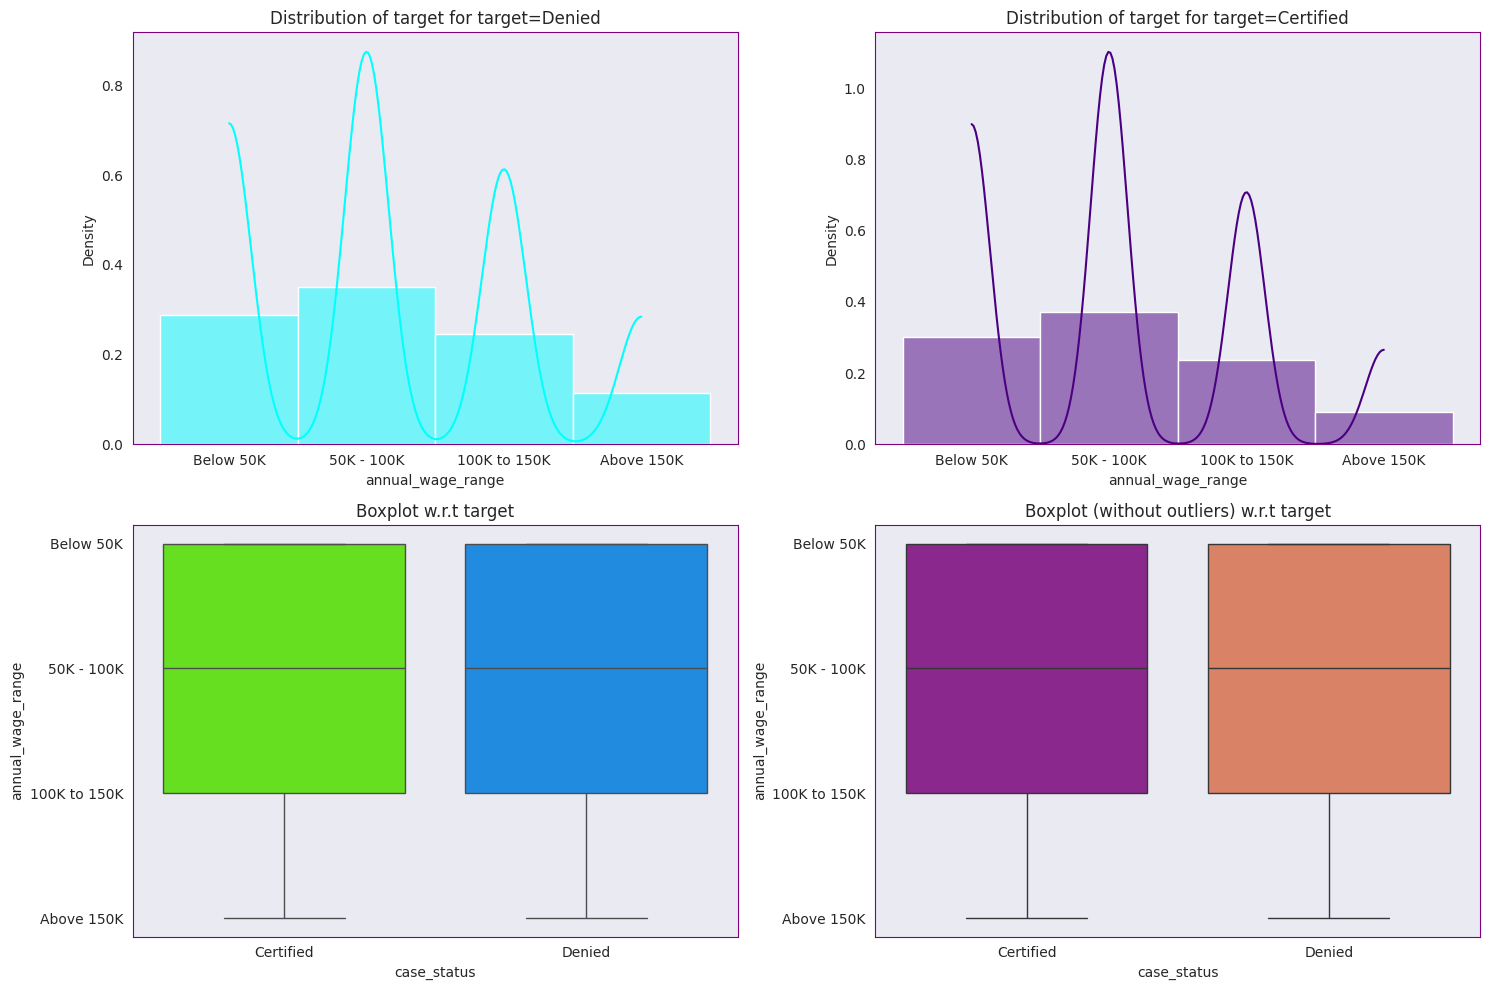

In [ ]:
distribution_plot_wrt_target(df2, "annual_wage_range", "case_status")

case_status        Certified  Denied    All
annual_wage_range                          
All                    17018    8462  25480
50K - 100K              6308    2976   9284
Below 50K               5144    2434   7578
100K to 150K            4050    2085   6135
Above 150K              1516     967   2483
------------------------------------------------------------------------------------------------------------------------


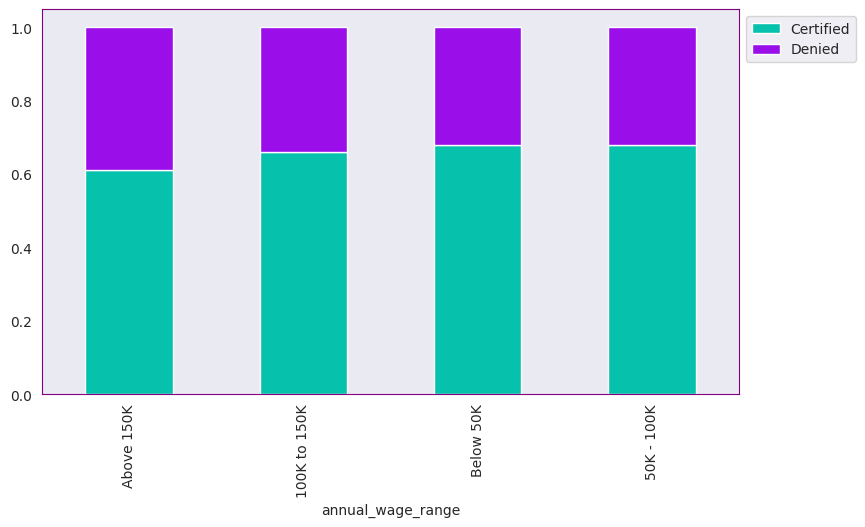

In [ ]:
stacked_barplot(df2, "annual_wage_range", "case_status")

case_status  Certified  Denied    All
pay_term                             
All              17018    8462  25480
Annual           16271    7052  23323
Day                747    1410   2157
------------------------------------------------------------------------------------------------------------------------


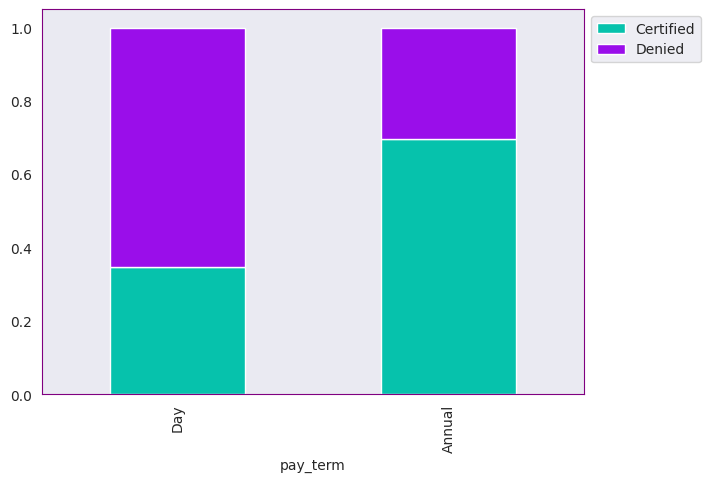

In [ ]:
stacked_barplot(df2, "pay_term", "case_status")

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

Highest certification to lowest certification rate is only a difference of 6.88%. <br>

Below 50K - Certified 67.88% Denied 32.12% <br>
50K - 100K - Certified 67.94% Denied 32.06% <br>
100K - 150K - Certified 66.01% Denied 33.99% <br>
Above 150K - Certified 61.06% Denied 38.94% <br>

Certified ranges from 61.06% to 67.94%. The highest certificaion rate is for applicants who make 50-100K.The lowest rate is for applicants who make above 1certification50K.<br>

You have a less chance of getting certified if your prevailing_wage is based on the day vs the year. <br>
Day - Certified 34.63%, Denied 65.37%
Annual - Certified 69.76%, Denied 30.24%



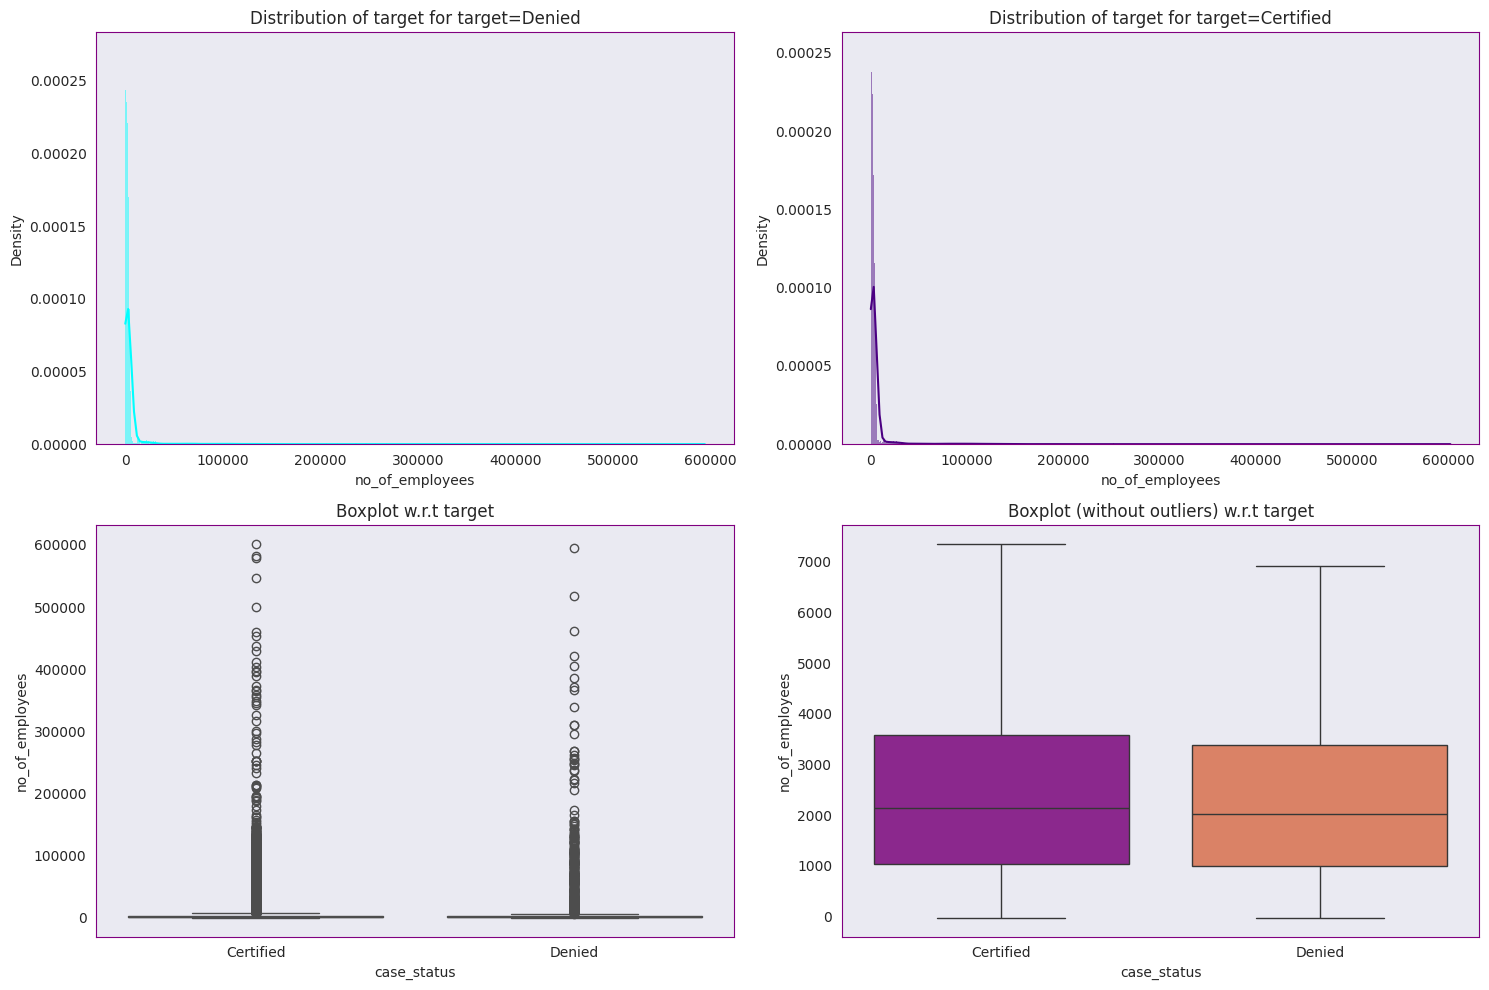

In [ ]:
distribution_plot_wrt_target(df2, "no_of_employees", "case_status")

In [ ]:
#Create a employee count range
df2["no_of_employees_range"] = pd.cut(
    x=df2.prevailing_wage,
    bins=[-np.infty, 25000, 75000, 100000,np.infty],
    labels=["Less than 25K", "25K and 75K", "75K to 100K", "Above 100K"],
)

df2["no_of_employees_range"].value_counts() # creating the no_of_employees category based on the employee count

no_of_employees_range
25K and 75K      8581
Above 100K       7559
Less than 25K    5008
75K to 100K      4332
Name: count, dtype: int64

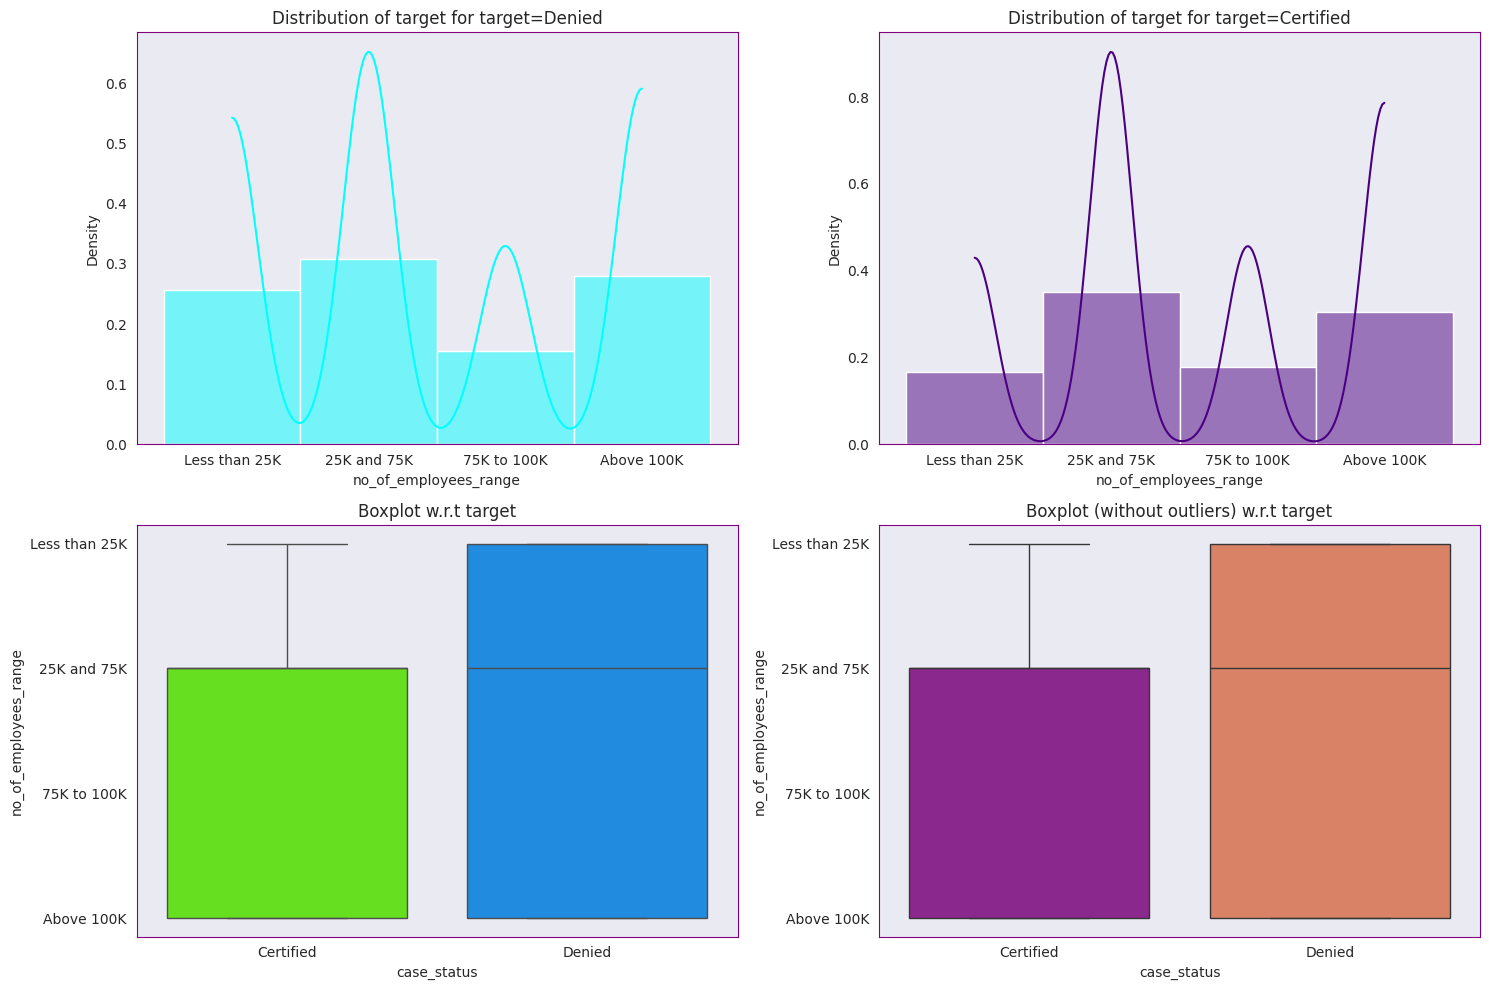

In [ ]:
distribution_plot_wrt_target(df2, "no_of_employees_range", "case_status")

case_status            Certified  Denied    All
no_of_employees_range                          
All                        17018    8462  25480
25K and 75K                 5972    2609   8581
Above 100K                  5195    2364   7559
Less than 25K               2837    2171   5008
75K to 100K                 3014    1318   4332
------------------------------------------------------------------------------------------------------------------------


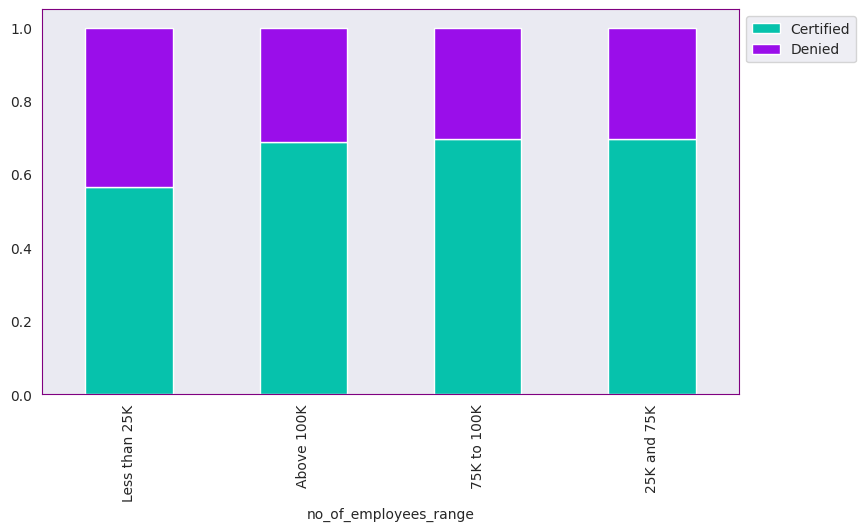

In [ ]:
stacked_barplot(df2, "no_of_employees_range", "case_status")

Less than 25K employees - Certified 56.65%  Denied 43.35% <br>
25K - 75K employees - Certified 69.60%  Denied 31.27% <br>
75K - 100K employees - Certified 69.58%  Denied 30.42% <br>
Above 100K employees - Certified 68.73%  Denied 31.27% <br>

Any companies that have greater than 25K of employees applicants have a ~69% to 70% certification rate. Companies that have less than 25K if employees applicants only have a 57% certification rate.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
 11  yr_of_estab_range      25480 non-null  category
 12  pay_term               25480 non-null  object  
 13  annual_wage            25480 non-null  float64 
 14  annual_wage_range      25480 non-null 

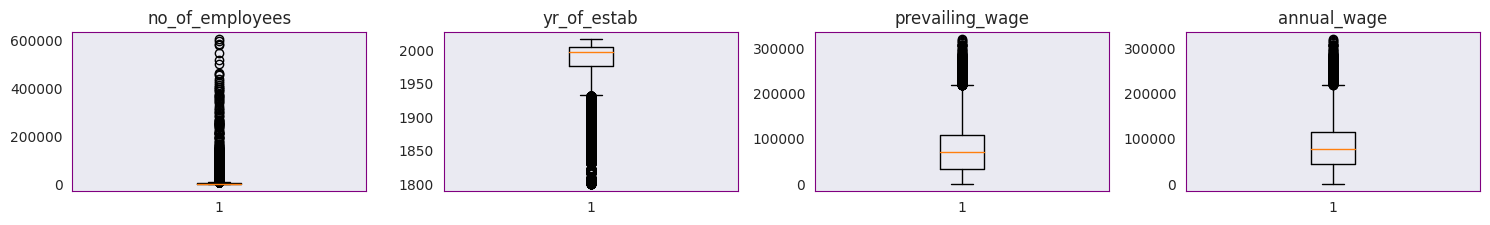

In [ ]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show();

There are several outliers in the data.

**Verify no_of_employees**

In [ ]:
#show the number of rows with a value of no_of_employees less than 0, which is not a possible value
df2[df2.no_of_employees<0].shape

(33, 16)

In [ ]:
#drop the rows with errors shown above and check the remaining number of rows
df2 = df2[df2.no_of_employees>0]
df2.shape

(25447, 16)

In [ ]:
df2["no_of_employees_range"].value_counts() # creating the no_of_employees category based on the wage values

no_of_employees_range
25K and 75K      8570
Above 100K       7550
Less than 25K    5001
75K to 100K      4326
Name: count, dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# shows statistical information
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25447,6,Asia,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25447,4,Bachelor's,10220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25447,2,Y,14786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25447,2,N,22498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25447.00,NaN,NaN,NaN,5674.42,22891.84,12.00,1025.00,2112.00,3506.50,602069.00
yr_of_estab,25447.00,NaN,NaN,NaN,1979.39,42.39,1800.00,1976.00,1997.00,2005.00,2016.00
region_of_employment,25447,5,Northeast,7189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25447.00,NaN,NaN,NaN,74468.28,52822.18,2.14,34039.21,70312.50,107739.51,319210.27
unit_of_wage,25447,4,Year,22933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25447,2,Y,22741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Asia is the most frequent continent. <br>
Bachelor's is the most frequent education of employees. <br>
More applicants have job experience than not. <br>
More applicants do not need job training than need training. <br>
Northeast is the most frequent region of employment. <br>
Year is the most frequent unit of wage. <br>
More applicants are going to have a full time position than not. <br>
More applicants are certified than not. <br>
More applicants have a low prevailing wage than any other range. <br>
More applicants are going to a company with a medium range of employees than any other range.


In [ ]:
df2['case_status'] = df2['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

In [ ]:
df2['case_status'].unique()

[0, 1]
Categories (2, int64): [1, 0]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  category
 3   requires_job_training  25447 non-null  category
 4   no_of_employees        25447 non-null  int64   
 5   yr_of_estab            25447 non-null  int64   
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  category
 10  case_status            25447 non-null  category
 11  yr_of_estab_range      25447 non-null  category
 12  pay_term               25447 non-null  object  
 13  annual_wage            25447 non-null  float64 
 14  annual_wage_range      25447 non-null  cate

##Spliting the data

We will use 70% of data for training and 30% for testing.

In [ ]:
#create a dataframe of the predictor feature columns
X = df2.drop('case_status',axis=1)
#create a datafrane of the predicted class (1=True, 0=False)
Y = df2['case_status']

#generate dummy variables for each categorical variable
X = pd.get_dummies(X, drop_first=True)

#split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)

In [ ]:
#confirm the split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [ ]:
#confirm the shape of both data sets and the ratio of classes is the same across both train and test datasets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17812, 33)
Shape of test set :  (7635, 33)
 
Percentage of classes in training set:
case_status
1   0.67
0   0.33
Name: proportion, dtype: float64
 
Percentage of classes in test set:
case_status
1   0.67
0   0.33
Name: proportion, dtype: float64


## Building bagging and boosting models

**Model Evaluation criterion**

**Model can make wrong predictions as:** <br>
1. Predicting an applicant should be approved and the applicant is denied. <br>
2. Predicting an applicant should be denied and the applicant is approved.<br>

**Which case is more important?** <br>

Both are important: <br>

*   If an applicant is approved despite being predicted for denial, an unqualified employee may end up filling a position that should have been given to a U.S. citizen.<br>
*   If an applicant is denied when predicted to be approved, U.S. companies will struggle to fill critical positions, leading to reduced overall productivity in the economy.<br>

**How to reduce the losses?** <br>

*   Given the resource-intensive nature of reviewing each application, this model should predict which candidates are likely to be approved. This way, agents can prioritize those applications. <br>
*   The F1 Score is a useful metric for evaluating models because higher F1 scores correspond to better performance in minimizing both False Negatives and False Positives <br>
*   We will use balanced class weights to ensure the model focuses equally on both classes. <br>

## Building the model
- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

**Defining functions to provide metric scores (i.e., accuracy, recall, and precision) on the train and test datasets and to show the resulting confusion matrices.**

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='',cmap='cool')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    train_F1_score = metrics.f1_score(y_train,pred_train)
    test_F1_score = metrics.f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_F1_score,test_F1_score ))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",round(model.score(X_train,y_train),4))
        print("Accuracy on test set : ",round(model.score(X_test,y_test),4))
        print("Recall on training set : ",round(metrics.recall_score(y_train,pred_train),4))
        print("Recall on test set : ",round(metrics.recall_score(y_test,pred_test),4))
        print("Precision on training set : ",round(metrics.precision_score(y_train,pred_train),4))
        print("Precision on test set : ",round(metrics.precision_score(y_test,pred_test),4))
        print("F1 score on training set : ",round(metrics.f1_score(y_train,pred_train),4))
        print("F1 score on test set : ",round(metrics.f1_score(y_test,pred_test),4))


    return score_list # returning the list with train and test scores

##Decision Tree Model

We’ll create our model using the DecisionTreeClassifier function with the default 'gini' criterion for splitting.

In [ ]:
decisiontree = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')

In [ ]:
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

**Confusion Matrix -**

*  Applicant was approved and the model predicted approval : True Positive (observed=1,predicted=1) <br>

* Applicant was denied and the model predicted approval : False Positive (observed=0,predicted=1) <br>

* Applicant was denied and the model predicted denial : True Negative (observed=0,predicted=0) <br>

* Applicant was approved and the model predicted denial : False Negative (observed=1,predicted=0) <br>

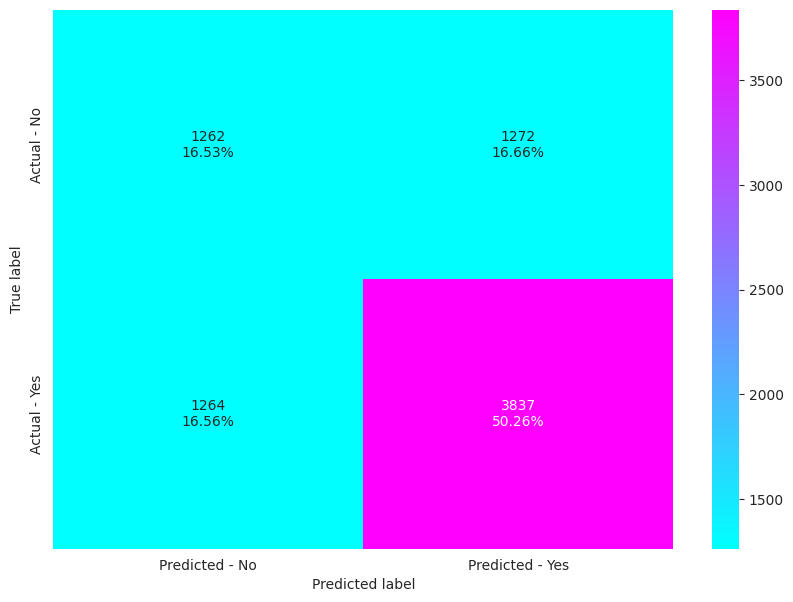

In [ ]:
make_confusion_matrix(decisiontree,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
decisiontree_score=get_metrics_score(decisiontree)

Accuracy on training set :  1.0
Accuracy on test set :  0.6678
Recall on training set :  1.0
Recall on test set :  0.7522
Precision on training set :  1.0
Precision on test set :  0.751
F1 score on training set :  1.0
F1 score on test set :  0.7516


The decision tree is showing 100% on everything for the training data.<br>
The decision tree is showing 75% on recall, precision, and F1 on the testing data and 67% on the accuracy.<br>
Since there is a big difference between the training and testing model, the model is overfit.

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

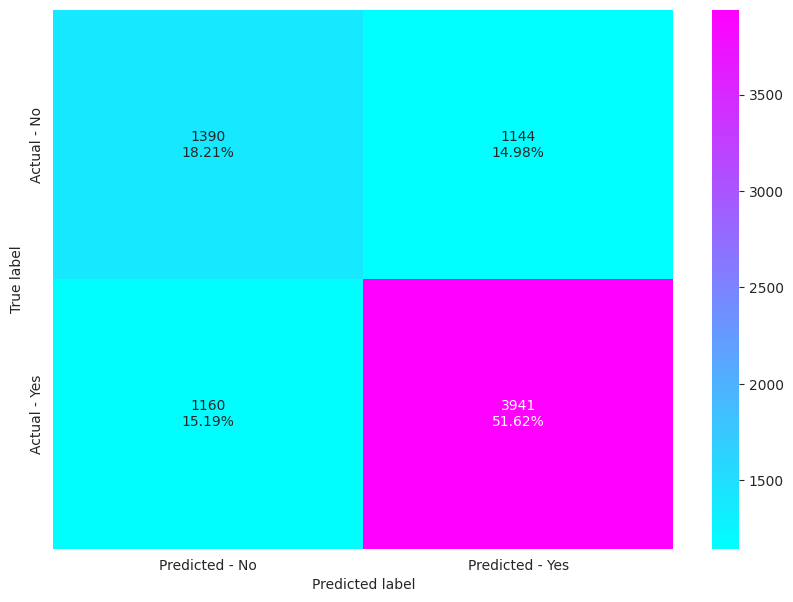

In [ ]:
make_confusion_matrix(bagging,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
bagging_score=get_metrics_score(bagging)

Accuracy on training set :  0.9851
Accuracy on test set :  0.6982
Recall on training set :  0.9864
Recall on test set :  0.7726
Precision on training set :  0.9913
Precision on test set :  0.775
F1 score on training set :  0.9888
F1 score on test set :  0.7738


The bagging classifier is showing 99% on everything for the training data.<br>
The bagging classifier is showing 77% on recall and F1, 78% on precision, and 70% on accuracy on the testing data.<br>
Since there is a big difference between the training and testing model, the model is overfit. <br>
The bagging classifier has a higher percentage on accuracy, recall, precision and F1 than the decision tree.

##Random Forest

In [ ]:
ranfor = RandomForestClassifier(random_state=1)
ranfor.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

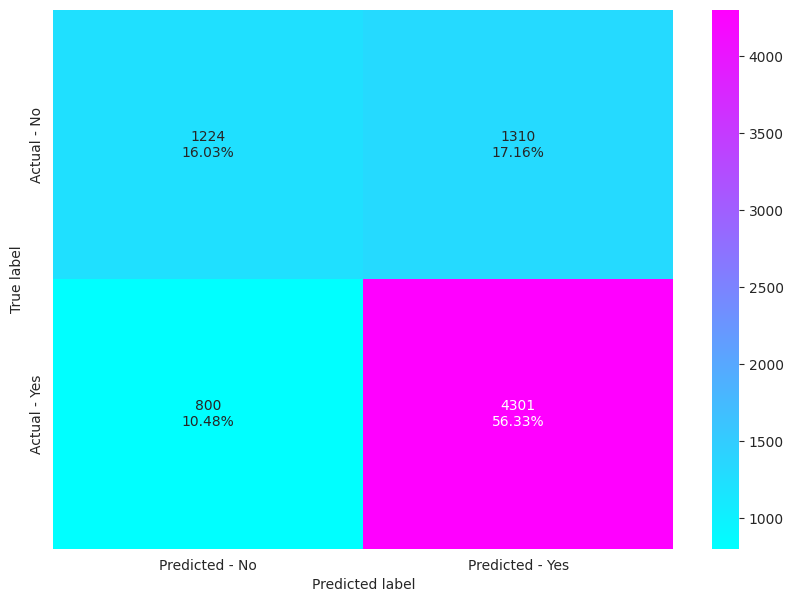

In [ ]:
make_confusion_matrix(ranfor,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
ranfor_score=get_metrics_score(ranfor)

Accuracy on training set :  0.9999
Accuracy on test set :  0.7236
Recall on training set :  1.0
Recall on test set :  0.8432
Precision on training set :  0.9999
Precision on test set :  0.7665
F1 score on training set :  1.0
F1 score on test set :  0.803


The random forest is showing 100% on everything for the training data.<br>
The random forest is showing 84% on recall, 80% F1, 77% on precision, and 72% on accuracy on the testing data.<br>
Since there is a big difference between the training and testing model, the model is overfit. <br>
The random first has the highest percentage on accuracy, recall, precision and F1 than any of the previous models.

### AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

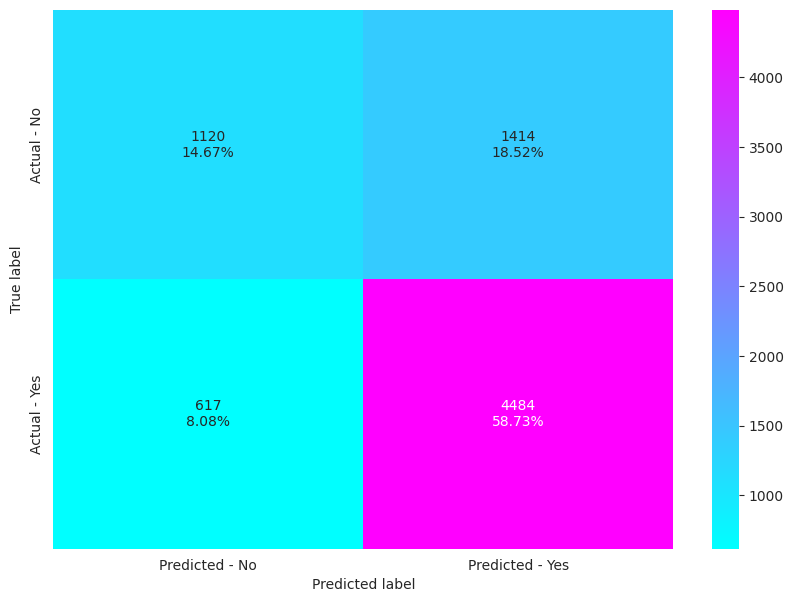

In [ ]:
make_confusion_matrix(abc,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.739
Accuracy on test set :  0.734
Recall on training set :  0.8905
Recall on test set :  0.879
Precision on training set :  0.76
Precision on test set :  0.7603
F1 score on training set :  0.8201
F1 score on test set :  0.8153


The AdaBoost is showing 74% on accuracy, 89% on recall, 76% on precision and 82% on the F1 score on the training data.<br>
The AdaBoost is showing 73% on accuracy, 88% on recall, 76% on precision and 82% on the F1 score on the testing data.<br>
The training and testing are almost identical when it comes to percentages. <br>
This demonstrates that both the training and testing model are performing equally well on the data. <br>
The AdaBoost has the highest percentage on accuracy, recall, and F1 than any of the previous models.

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

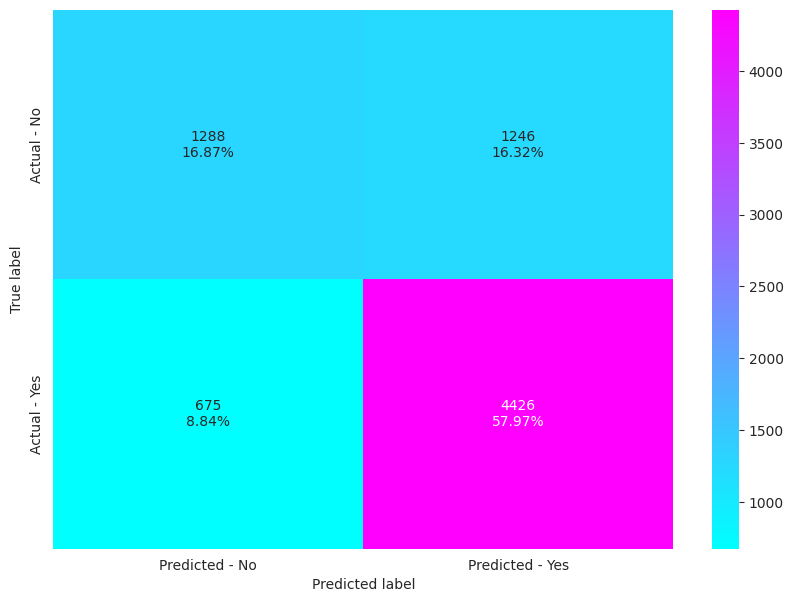

In [ ]:
make_confusion_matrix(gbc,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7568
Accuracy on test set :  0.7484
Recall on training set :  0.8801
Recall on test set :  0.8677
Precision on training set :  0.7829
Precision on test set :  0.7803
F1 score on training set :  0.8286
F1 score on test set :  0.8217


The Gradient Boosting is showing 76% on accuracy, 88% on recall, 78% on precision and 83% on the F1 score on the training data.<br>
The Gradient Boosting is showing 75% on accuracy, 87% on recall, 78% on precision and 82% on the F1 score on the testing data.<br>
The training and testing are almost identical when it comes to percentages. <br>
This demonstrates that both the training and testing model are performing equally well on the data. <br>
The Gradient Boosting has the highest percentage on accuracy, precision, and F1 than any of the previous models.

### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

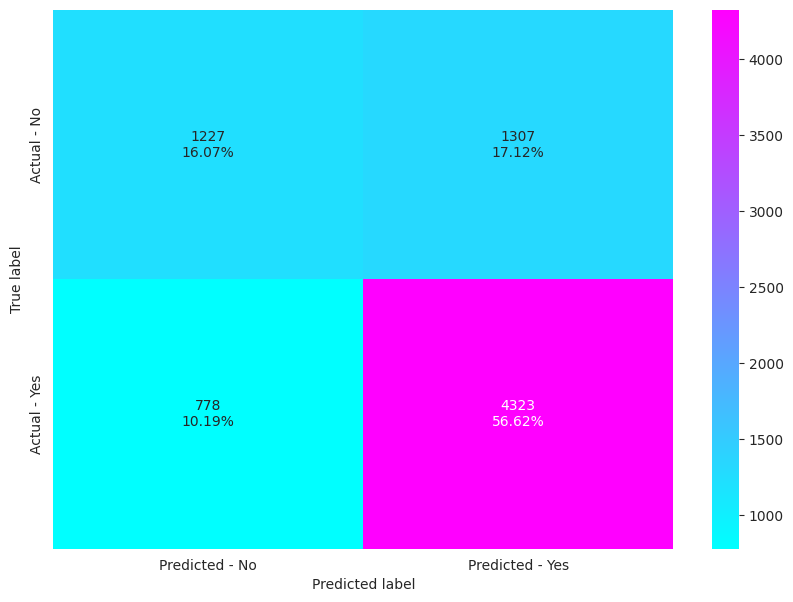

In [ ]:
make_confusion_matrix(xgb,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8452
Accuracy on test set :  0.7269
Recall on training set :  0.9355
Recall on test set :  0.8475
Precision on training set :  0.8484
Precision on test set :  0.7679
F1 score on training set :  0.8898
F1 score on test set :  0.8057


The XGBoost is showing 85% on accuracy, 94% on recall, 85% on precision and 89% on the F1 score on the training data.<br>
The XGBoost is showing 73% on accuracy, 85% on recall, 77% on precision and 81% on the F1 score on the testing data.<br>
There are differences between the training and testing when it comes to all the percentages. This indicates there is overfitting. <br>
The XGBoost has higher percentages on the training data than Gradient Boosting but not on the testing data.
The Gradient Boosting still has the highest percentage on accuracy, precision, and F1 than any of the previous models.

##Base model comparison

In [ ]:
# defining list of models
models = [decisiontree, bagging, ranfor, abc, gbc, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_score_train = []
F1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],4))
    acc_test.append(np.round(j[1],4))
    recall_train.append(np.round(j[2],4))
    recall_test.append(np.round(j[3],4))
    precision_train.append(np.round(j[4],4))
    precision_test.append(np.round(j[5],4))
    F1_score_train.append(np.round(j[6],4))
    F1_score_test.append(np.round(j[7],4))

In [ ]:
# Set the display format to show 4 decimal places
pd.options.display.float_format = '{:.4f}'.format

comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'AdaBoost with default paramters',
                                          'Gradient Boosting with default parameters',
                                          'XGBoost with default parameters'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_F1_score': F1_score_train,
                                          'Test_F1_score': F1_score_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_score,Test_F1_score
0,Decision Tree,1.0000,0.6678,1.0000,0.7522,1.0000,0.7510,1.0000,0.7516
1,Bagging Classifier,0.9851,0.6982,0.9864,0.7726,0.9913,0.7750,0.9888,0.7738
2,Random Forest,0.9999,0.7236,1.0000,0.8432,0.9999,0.7665,1.0000,0.8030
3,AdaBoost with default paramters,0.7390,0.7340,0.8905,0.8790,0.7600,0.7603,0.8201,0.8153
4,Gradient Boosting with default parameters,0.7568,0.7484,0.8801,0.8677,0.7829,0.7803,0.8286,0.8217
5,XGBoost with default parameters,0.8452,0.7269,0.9355,0.8475,0.8484,0.7679,0.8898,0.8057


* Decison Tree model shows overfitting in the train dataset. Showing 100% in all the training percentages. <br>
* Bagging model is showing overfitting. Showing 99-100% in all the training percentages <br>
* Random Forest model is showing overfitting. Showing 100% in all the training percentages <br>
* AdaBoost model does not show much overfitting and the model is performing equally well on the train and test dataset . Minimal difference between the two.<br>
* Gradient Boosting model does not show much overfitting and the model is performing equally well on the train and test dataset . Minimal difference between the two.<br>
* XGBoost Tuned model model does not show much overfitting (a little more than the AdaBoost and Gradient Boost models) and the model is performing equally well on the train and test dataset . Minimal difference between the two.<br>

* Best performing model is Gradient Boosting. There is only a 1% difference in the AdaBoost and Gradient Boosting model in Recall with AdaBoost performing better, however Gradient Boosting performs better in Accuracy, Precision and F1 score.

#Hyperparameter tuning

#Decision Tree Tuning

Hyperparameters available for Decision Tree classifier include:<br>

* max_depth: the maximum depth that we allow the tree to grow to. <br>
* min_samples_split: the minimum number of samples required to split an internal node. <br>
* min_samples_leaf: the minimum number of samples required to be at a leaf node. <br>
* max_features: the maximum number of features to consider when looking for the best split. <br>
* min_weight_fraction_leaf: the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. <br>
* random_state: the seed used by the random number generator. <br>
* class_weight: weights associated with classes in the form {class_label: weight}. <br>

In [ ]:
# Choose the type of classifier.
dt_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10, 15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1,1]
             }

# Type of scoring used to compare parameter combinations
dt_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
rand_dt = RandomizedSearchCV(dt_tuned, param_grid, scoring=dt_scorer, cv=5)
rand_rf = rand_dt.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = rand_rf.best_estimator_

# Fit the best algorithm to the data.
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

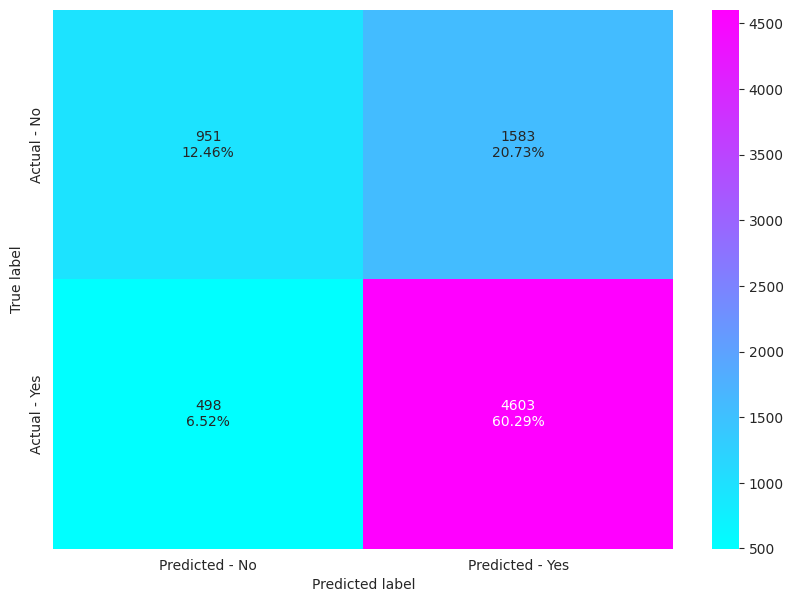

In [ ]:
make_confusion_matrix(dt_tuned,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
dt_tuned_score=get_metrics_score(dt_tuned)

Accuracy on training set :  0.7307
Accuracy on test set :  0.7274
Recall on training set :  0.9071
Recall on test set :  0.9024
Precision on training set :  0.7452
Precision on test set :  0.7441
F1 score on training set :  0.8182
F1 score on test set :  0.8156


Tuning the decision tree helped the model, has made significant improvements to the original model. <br>
Using the model, training and testing are performing equally well. <br>
Tuning has removed the overfitting that was present on the decisiontree model. <br>


<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 33 artists>

([<matplotlib.axis.YTick at 0x7de4ac2fb640>,
 [Text(0, 0, 'no_of_employees'),
  Text(0, 1, 'no_of_employees_range_25K and 75K'),
  Text(0, 2, 'annual_wage_range_Above 150K'),
  Text(0, 3, 'annual_wage_range_100K to 150K'),
  Text(0, 4, 'annual_wage_range_50K - 100K'),
  Text(0, 5, 'yr_of_estab_range_Less than 20 yrs'),
  Text(0, 6, 'yr_of_estab_range_20-49 yrs'),
  Text(0, 7, 'yr_of_estab_range_50-99 yrs'),
  Text(0, 8, 'yr_of_estab_range_100-149 yrs'),
  Text(0, 9, 'full_time_position_Y'),
  Text(0, 10, 'unit_of_wage_Year'),
  Text(0, 11, 'unit_of_wage_Week'),
  Text(0, 12, 'unit_of_wage_Month'),
  Text(0, 13, 'region_of_employment_West'),
  Text(0, 14, 'no_of_employees_range_75K to 100K'),
  Text(0, 15, 'region_of_employment_South'),
  Text(0, 16, 'no_of_employees_range_Above 100K'),
  Text(0, 17, 'requires_job_training_Y'),
  Text(0, 18, 'yr_of_estab'),
  Text(0, 19, 'prevailing_wage'),
  Text(0, 20, 'annual_wage'),
  Text(0, 21, 'continent_Asia'),
  Text(0, 22, 'continent_South Ame

Text(0.5, 0, 'Relative Importance')

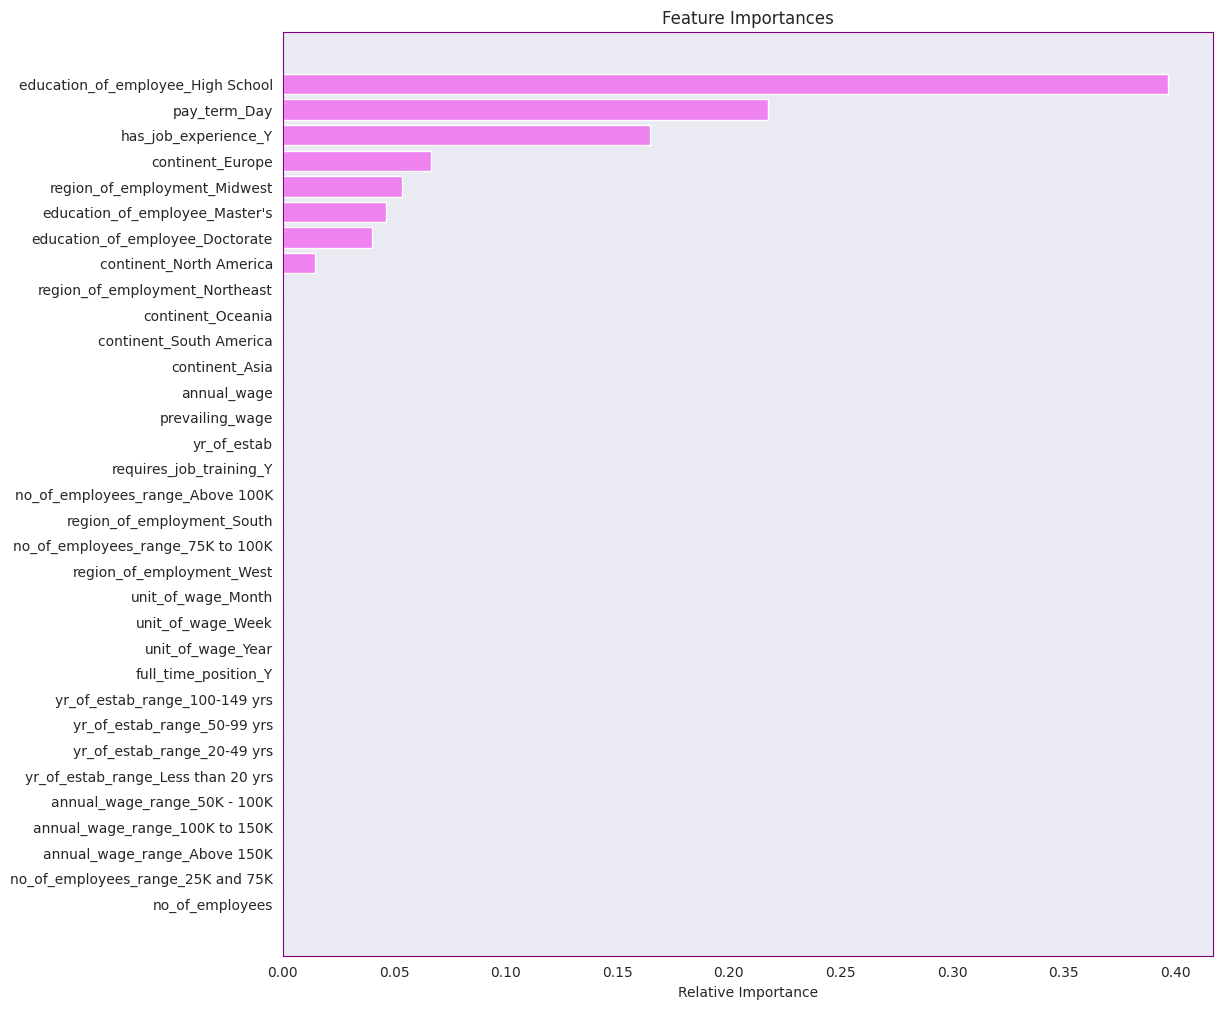

In [ ]:
importances = dt_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(dt_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
education_of_employee_High School 0.3969
pay_term_Day                      0.2176
has_job_experience_Y              0.1644
continent_Europe                  0.0666
region_of_employment_Midwest      0.0536
education_of_employee_Master's    0.0463
education_of_employee_Doctorate   0.0399
continent_North America           0.0146
yr_of_estab_range_100-149 yrs     0.0000
yr_of_estab_range_50-99 yrs       0.0000


Education of employee in High School is the most important feature. <br>
Only 8 features were deemed important.

#Bagging Tuned

Hyperparameters available for Bagging classifier include:

* base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
* n_estimators: The number of trees in the forest, default = 100.
* max_features: The number of features to consider when looking for the best split.
* bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
* bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
* max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, * where N is the number of observations in the train data.
* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [ ]:
# Choose the type of classifier.
bag_tuned = BaggingClassifier(random_state=1)

# random search for bagging classifier
param_grid = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(30, 50, 70)
             }

#run the randomized search
rand_bag = RandomizedSearchCV(bag_tuned, param_grid, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_bag = rand_bag.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = rand_bag.best_estimator_

# Fit the best algorithm to the data
bag_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=30,
                  random_state=1)

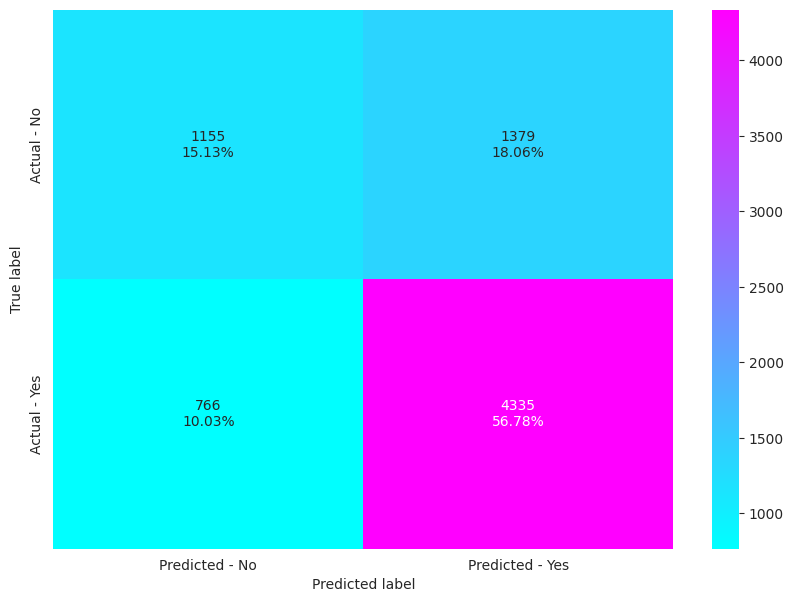

In [ ]:
make_confusion_matrix(bag_tuned,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
bag_tuned_score=get_metrics_score(bag_tuned)

Accuracy on training set :  0.9885
Accuracy on test set :  0.7191
Recall on training set :  0.9958
Recall on test set :  0.8498
Precision on training set :  0.9872
Precision on test set :  0.7587
F1 score on training set :  0.9915
F1 score on test set :  0.8017


After tuning bagging model it is still overfit. <br>
Model is performing better on test for accuracy, recall and F1 score but it still not reliable since it is overfit.

Bagging does not have Attributal Feature Importances.

#Random Forest Tuned

Hyperparameters available for Random Forest classifier include:

* n_estimators: The number of trees in the forest, default = 100.
* max_depth: The maximum depth that we allow the tree to grow to. <br>
* min_samples_split: The minimum number of samples required to split an internal node. <br>
* min_samples_leaf: The minimum number of samples required to be at a leaf node. <br>
* max_features: The maximum number of features to consider when looking for the best split. <br>
* max_leaf_nodes: It sets a limit on the splitting of the node and thus helps to reduce the depth of the tree. If the value is set to None, the tree continues to grow infinitely. <br>
* max_samples: The maximum number of samples from the training dataset to train each individual tree. <br>
* class_weight: weights associated with classes in the form {class_label: weight}.
* For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1.
* bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {"n_estimators": np.arange(50, 110, 25),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": [np.arange(0.3, 0.6, 0.1),"sqrt", "log2"],
              "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_tuned, param_grid, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = rand_rf.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = rand_rf.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)



RandomForestClassifier(max_samples=0.4, min_samples_leaf=9, min_samples_split=3,
                       n_estimators=75, random_state=1)

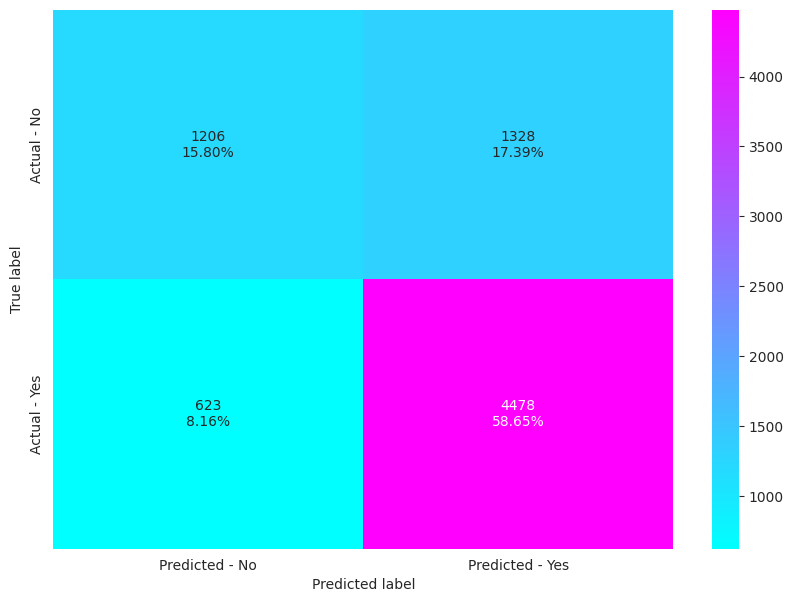

In [ ]:
make_confusion_matrix(rf_tuned,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
rf_tuned_score=get_metrics_score(rf_tuned)

Accuracy on training set :  0.7668
Accuracy on test set :  0.7445
Recall on training set :  0.8975
Recall on test set :  0.8779
Precision on training set :  0.7845
Precision on test set :  0.7713
F1 score on training set :  0.8372
F1 score on test set :  0.8211


Tuning the random forrest helped the model, has made significant improvements to the original model. <br>
Using the model, training and testing are performing equally well. <br>
Tuning has removed the overfitting that was present on the decisiontree model. <br>


<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 33 artists>

([<matplotlib.axis.YTick at 0x7de4ac42beb0>,
 [Text(0, 0, 'unit_of_wage_Month'),
  Text(0, 1, 'continent_Oceania'),
  Text(0, 2, 'unit_of_wage_Week'),
  Text(0, 3, 'yr_of_estab_range_100-149 yrs'),
  Text(0, 4, 'annual_wage_range_Above 150K'),
  Text(0, 5, 'no_of_employees_range_75K to 100K'),
  Text(0, 6, 'yr_of_estab_range_50-99 yrs'),
  Text(0, 7, 'no_of_employees_range_Above 100K'),
  Text(0, 8, 'continent_South America'),
  Text(0, 9, 'annual_wage_range_100K to 150K'),
  Text(0, 10, 'requires_job_training_Y'),
  Text(0, 11, 'yr_of_estab_range_Less than 20 yrs'),
  Text(0, 12, 'full_time_position_Y'),
  Text(0, 13, 'annual_wage_range_50K - 100K'),
  Text(0, 14, 'no_of_employees_range_25K and 75K'),
  Text(0, 15, 'yr_of_estab_range_20-49 yrs'),
  Text(0, 16, 'continent_North America'),
  Text(0, 17, 'region_of_employment_South'),
  Text(0, 18, 'region_of_employment_Northeast'),
  Text(0, 19, 'continent_Asia'),
  Text(0, 20, 'region_of_employment_West'),
  Text(0, 21, 'region_of_empl

Text(0.5, 0, 'Relative Importance')

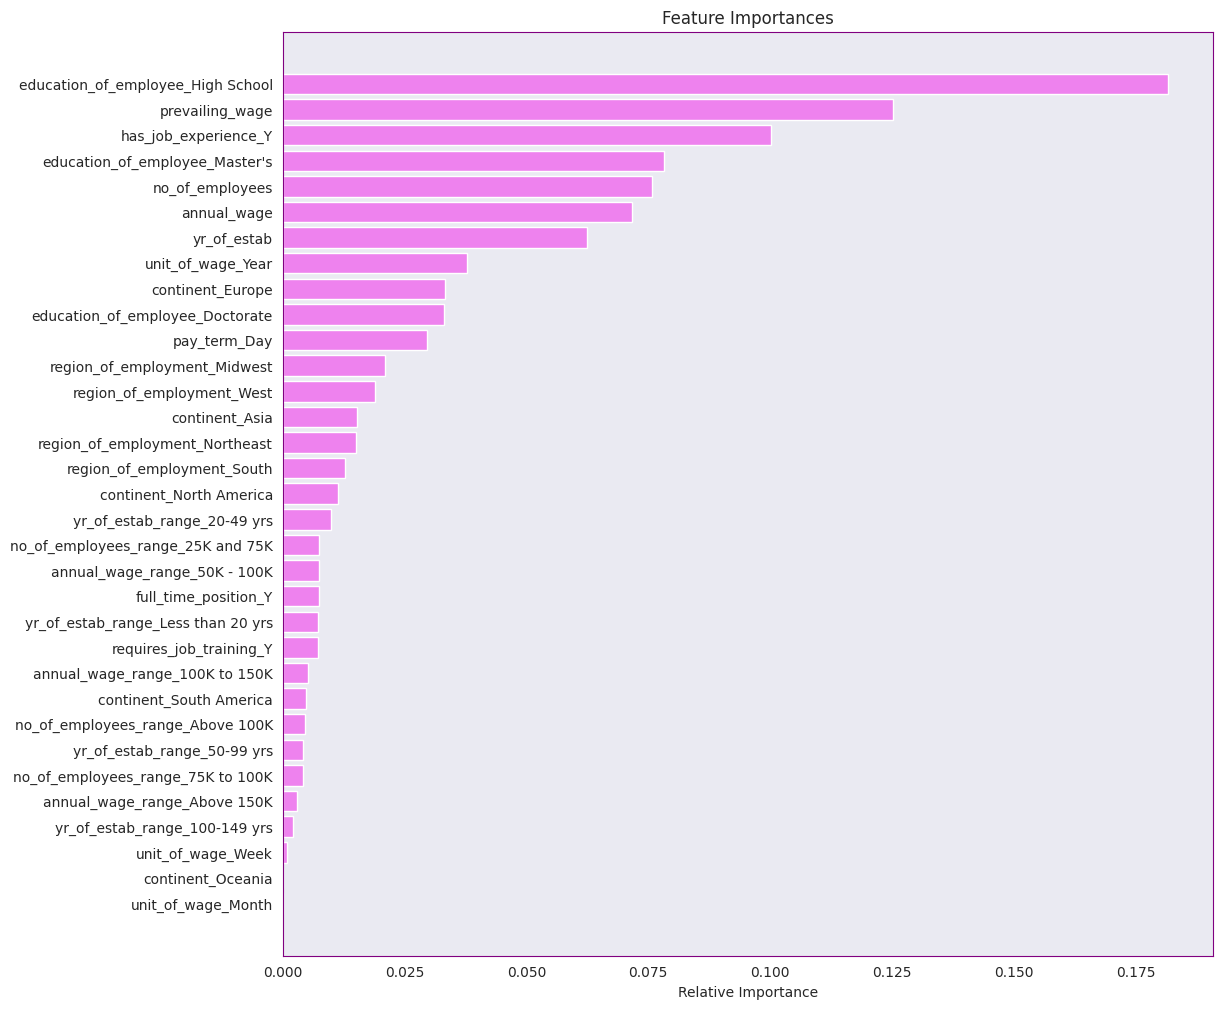

In [ ]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
education_of_employee_High School 0.1816
prevailing_wage                   0.1251
has_job_experience_Y              0.1002
education_of_employee_Master's    0.0782
no_of_employees                   0.0757
annual_wage                       0.0717
yr_of_estab                       0.0625
unit_of_wage_Year                 0.0379
continent_Europe                  0.0332
education_of_employee_Doctorate   0.0331


Education of employee in High School is the most important feature. <br>
Only 31 features were deemed important.

#AdaBoost Tuned

Hyperparameters available for Bagging classifier include:

* base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
* n_estimators: The number of trees in the forest, default = 100.
* learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
param_grid = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
    "n_estimators": np.arange(50,110,25),
    "learning_rate":np.arange(0.01,0.1,0.5)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_abc = RandomizedSearchCV(abc_tuned, param_grid, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=75, random_state=1)

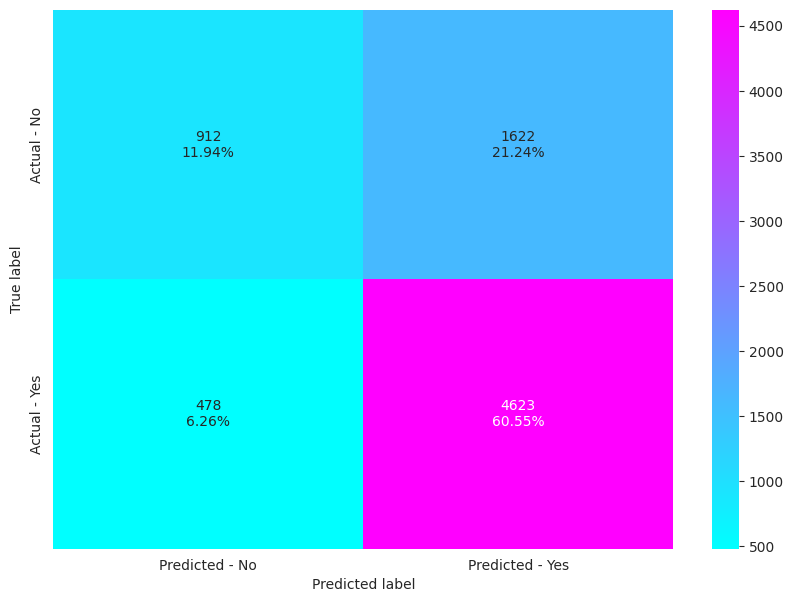

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.7289
Accuracy on test set :  0.725
Recall on training set :  0.9129
Recall on test set :  0.9063
Precision on training set :  0.7412
Precision on test set :  0.7403
F1 score on training set :  0.8182
F1 score on test set :  0.8149


Tuning the AdaBoost did not make much difference.<br>
Recall went up slightly but Accuracy, Precision and F1 score went down slightly.

<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 33 artists>

([<matplotlib.axis.YTick at 0x7de4ac0a6d40>,
 [Text(0, 0, 'no_of_employees'),
  Text(0, 1, 'no_of_employees_range_25K and 75K'),
  Text(0, 2, 'annual_wage_range_Above 150K'),
  Text(0, 3, 'annual_wage_range_100K to 150K'),
  Text(0, 4, 'annual_wage_range_50K - 100K'),
  Text(0, 5, 'yr_of_estab_range_Less than 20 yrs'),
  Text(0, 6, 'yr_of_estab_range_20-49 yrs'),
  Text(0, 7, 'yr_of_estab_range_50-99 yrs'),
  Text(0, 8, 'yr_of_estab_range_100-149 yrs'),
  Text(0, 9, 'full_time_position_Y'),
  Text(0, 10, 'unit_of_wage_Year'),
  Text(0, 11, 'unit_of_wage_Week'),
  Text(0, 12, 'unit_of_wage_Month'),
  Text(0, 13, 'region_of_employment_West'),
  Text(0, 14, 'no_of_employees_range_75K to 100K'),
  Text(0, 15, 'region_of_employment_South'),
  Text(0, 16, 'region_of_employment_Midwest'),
  Text(0, 17, 'yr_of_estab'),
  Text(0, 18, 'prevailing_wage'),
  Text(0, 19, 'annual_wage'),
  Text(0, 20, 'continent_Asia'),
  Text(0, 21, 'continent_Europe'),
  Text(0, 22, 'region_of_employment_Northeast

Text(0.5, 0, 'Relative Importance')

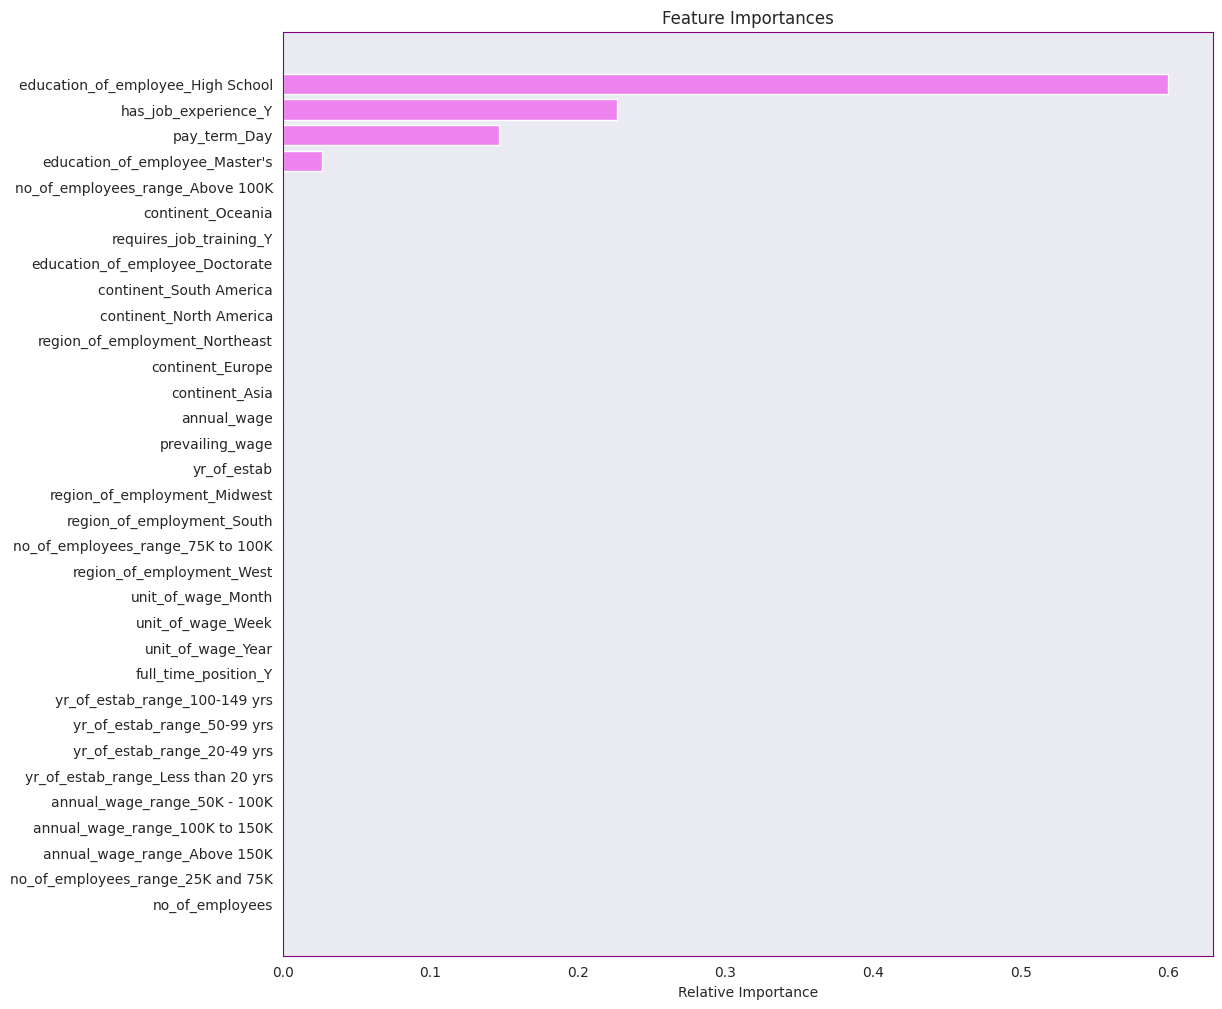

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
education_of_employee_High School 0.6000
has_job_experience_Y              0.2267
pay_term_Day                      0.1467
education_of_employee_Master's    0.0267
no_of_employees                   0.0000
unit_of_wage_Year                 0.0000
full_time_position_Y              0.0000
yr_of_estab_range_100-149 yrs     0.0000
yr_of_estab_range_50-99 yrs       0.0000
yr_of_estab_range_20-49 yrs       0.0000


Education of employee in High School is the most important feature. <br>
Only 4 features were deemed important.<br>
These are the same top 4 features in all the models so far.

#Gradient Boost Tuned

Hyperparameters available for Gradient Boost classifier include:

* Most of the hyperparameters available are same as random forest classifier.
* init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a *
  DummyEstimator predicting the classes priors is used.
* There is no class_weights parameter in gradient boosting.

#AdaBoost classifier as the estimator for initial predictions

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

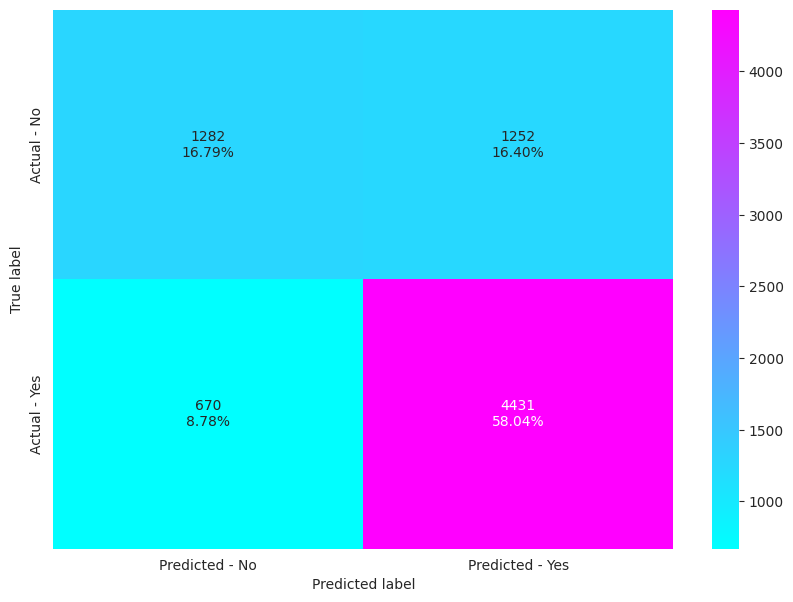

In [ ]:
make_confusion_matrix(gbc_init,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.7574
Accuracy on test set :  0.7483
Recall on training set :  0.8802
Recall on test set :  0.8687
Precision on training set :  0.7834
Precision on test set :  0.7797
F1 score on training set :  0.829
F1 score on test set :  0.8218


**As compared to the model with default parameters:**

- Test accuracy and test recall have increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
param_grid = {"n_estimators": [50,110,25],
              "subsample":[0.7,0.8,0.9, 1],
              "max_features":[0.5,0.7,1],
              "learning_rate": np.arange(0.01, 0.1, 0.05)}

# Type of scoring used to compare parameter combinations
gbc_tuned_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_gb = RandomizedSearchCV(gbc_tuned, param_grid, scoring=gbc_tuned_scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = rand_gb.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.060000000000000005, max_features=0.7,
                           n_estimators=110, random_state=1, subsample=1)

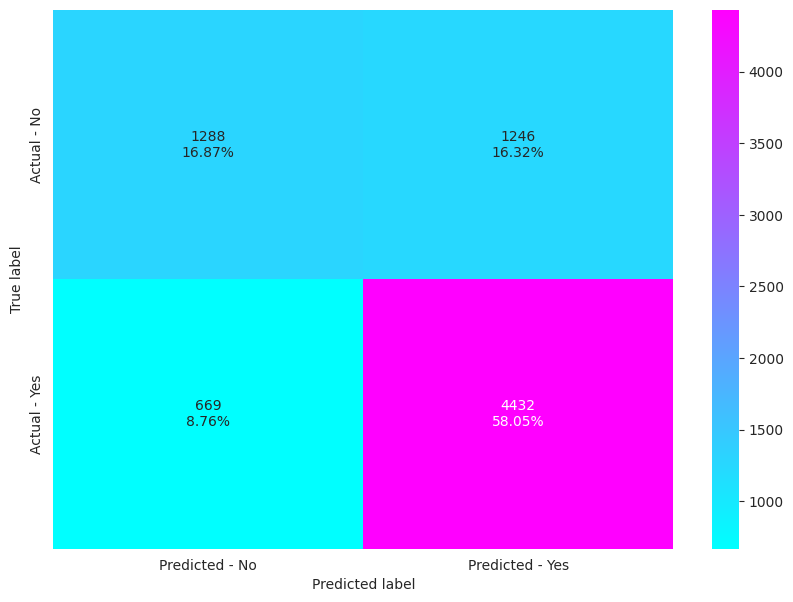

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7549
Accuracy on test set :  0.7492
Recall on training set :  0.8786
Recall on test set :  0.8688
Precision on training set :  0.7816
Precision on test set :  0.7806
F1 score on training set :  0.8273
F1 score on test set :  0.8223


For training - the tuned Gradient Boost model is showing lower percentages on accuracy, F1 score and recall. The precision percentages stayed the same. This indicates the tuning has removed the overfitting that was in the original model. <br>
For testing - the tuned Gradient Boost model is showing higher percentages on accuracy, precision and F1 score. The recall percentages went down slightly. <br>
Training and testing are performing about equal.<br>
There is a minor improvementon in the tuned model.

<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 33 artists>

([<matplotlib.axis.YTick at 0x7de4a6ea25f0>,
 [Text(0, 0, 'no_of_employees_range_Above 100K'),
  Text(0, 1, 'unit_of_wage_Week'),
  Text(0, 2, 'yr_of_estab_range_100-149 yrs'),
  Text(0, 3, 'unit_of_wage_Month'),
  Text(0, 4, 'annual_wage_range_50K - 100K'),
  Text(0, 5, 'yr_of_estab_range_Less than 20 yrs'),
  Text(0, 6, 'annual_wage_range_Above 150K'),
  Text(0, 7, 'annual_wage_range_100K to 150K'),
  Text(0, 8, 'no_of_employees_range_75K to 100K'),
  Text(0, 9, 'no_of_employees_range_25K and 75K'),
  Text(0, 10, 'continent_Oceania'),
  Text(0, 11, 'yr_of_estab_range_50-99 yrs'),
  Text(0, 12, 'yr_of_estab_range_20-49 yrs'),
  Text(0, 13, 'full_time_position_Y'),
  Text(0, 14, 'requires_job_training_Y'),
  Text(0, 15, 'yr_of_estab'),
  Text(0, 16, 'continent_Asia'),
  Text(0, 17, 'no_of_employees'),
  Text(0, 18, 'annual_wage'),
  Text(0, 19, 'continent_South America'),
  Text(0, 20, 'region_of_employment_Northeast'),
  Text(0, 21, 'region_of_employment_South'),
  Text(0, 22, 'region

Text(0.5, 0, 'Relative Importance')

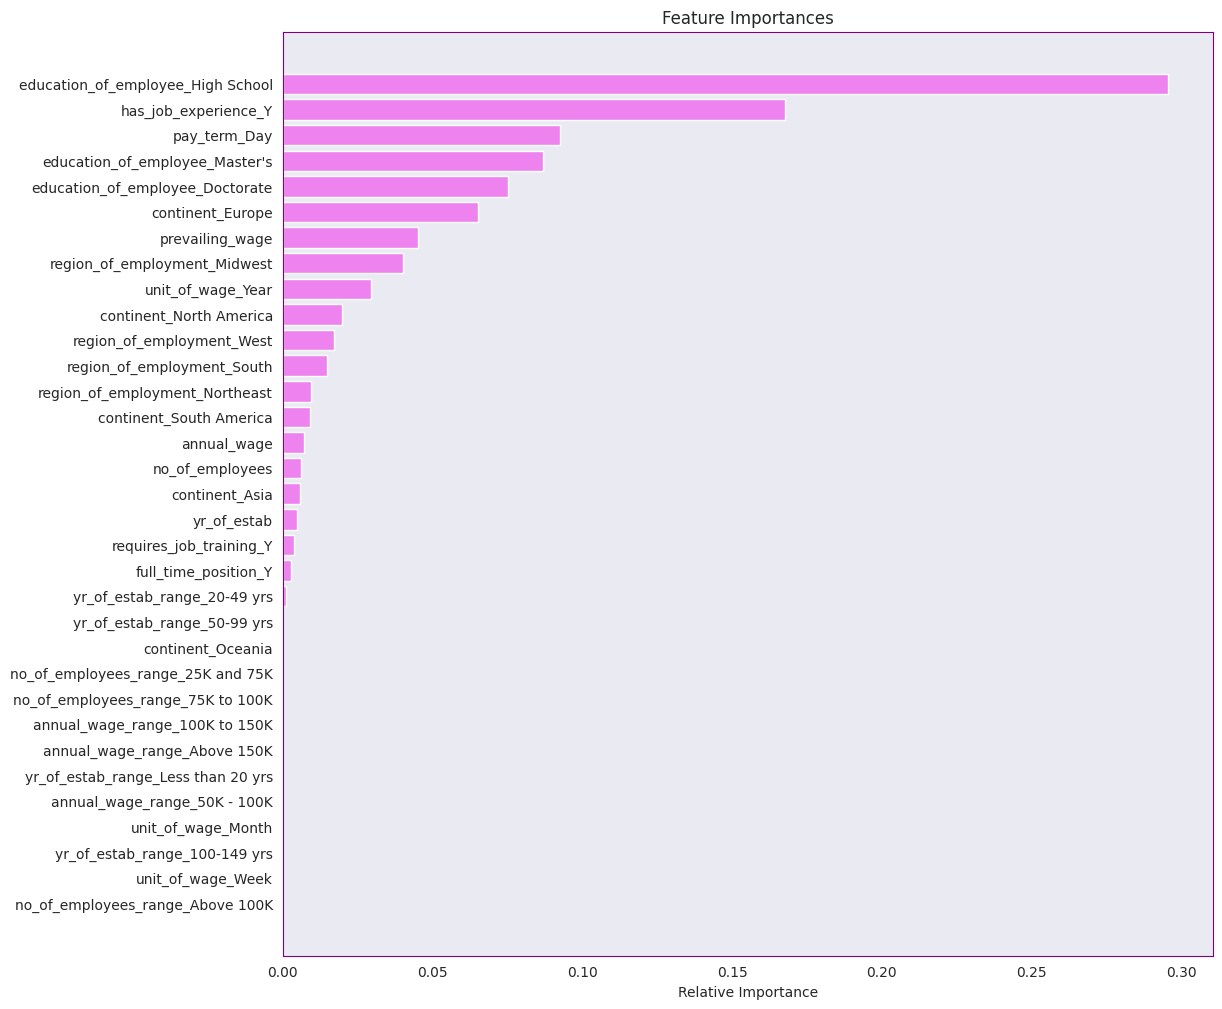

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
education_of_employee_High School 0.2956
has_job_experience_Y              0.1677
pay_term_Day                      0.0925
education_of_employee_Master's    0.0868
education_of_employee_Doctorate   0.0754
continent_Europe                  0.0651
prevailing_wage                   0.0453
region_of_employment_Midwest      0.0400
unit_of_wage_Year                 0.0297
continent_North America           0.0197


Education of employee in High School is the most important feature. <br>
Only 20 features were deemed important.<br>
These are the same top 4 features in all the models so far.

#XGBoost Tuned

Some of the hyperparameters available for XGBoost classifier include:

* scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
* subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
* colsample_bytree: Corresponds to the fraction of features (the columns) to use.
* colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
* colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
* max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
* learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
* gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9],
    "learning_rate":[0.01,0.1,0.05],
    "gamma":[1,3],
   }

# Type of scoring used to compare parameter combinations
xgb_scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized search
rand_xgb = RandomizedSearchCV(xgb_tuned, param_grid, scoring=xgb_scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

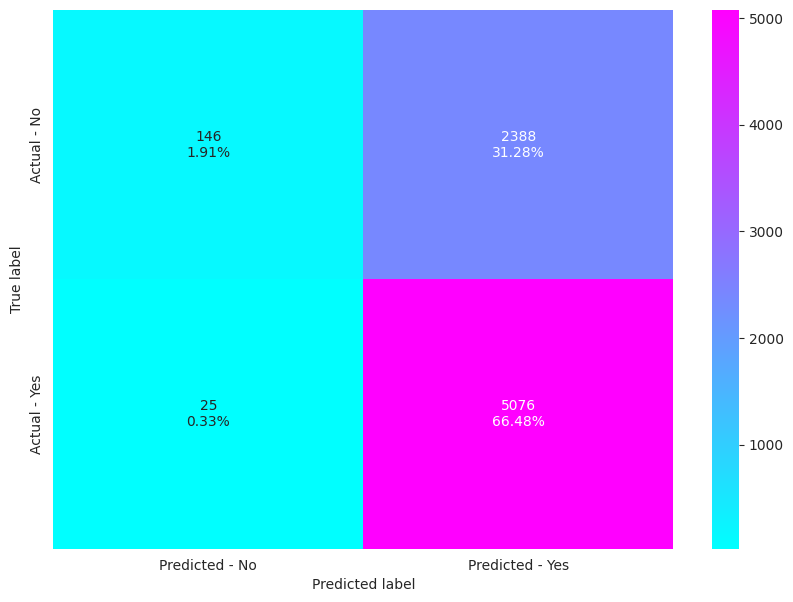

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

In [ ]:
#Accuracy, recall, precision and F1 score on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.6921
Accuracy on test set :  0.684
Recall on training set :  0.9997
Recall on test set :  0.9951
Precision on training set :  0.6846
Precision on test set :  0.6801
F1 score on training set :  0.8127
F1 score on test set :  0.808


For testing - the tuned XGBoost model is showing lower percentages on accuracy, recall, precision and F1 score. This indicates the tuning has removed the overfitting that was in the original model. <br>
For training - the tuned XGBoost model is showing higher percentages on accuracy, recall, precision and F1 score. <br>
Training and testing are performing about equal.<br>
There is a minor improvementon the tuned model.

<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 33 artists>

([<matplotlib.axis.YTick at 0x7de4a6d91750>,
 [Text(0, 0, 'no_of_employees_range_Above 100K'),
  Text(0, 1, 'yr_of_estab_range_Less than 20 yrs'),
  Text(0, 2, 'annual_wage_range_Above 150K'),
  Text(0, 3, 'no_of_employees_range_25K and 75K'),
  Text(0, 4, 'annual_wage_range_100K to 150K'),
  Text(0, 5, 'unit_of_wage_Month'),
  Text(0, 6, 'yr_of_estab_range_20-49 yrs'),
  Text(0, 7, 'unit_of_wage_Week'),
  Text(0, 8, 'no_of_employees'),
  Text(0, 9, 'annual_wage_range_50K - 100K'),
  Text(0, 10, 'yr_of_estab_range_50-99 yrs'),
  Text(0, 11, 'annual_wage'),
  Text(0, 12, 'yr_of_estab'),
  Text(0, 13, 'yr_of_estab_range_100-149 yrs'),
  Text(0, 14, 'requires_job_training_Y'),
  Text(0, 15, 'no_of_employees_range_75K to 100K'),
  Text(0, 16, 'continent_South America'),
  Text(0, 17, 'prevailing_wage'),
  Text(0, 18, 'continent_North America'),
  Text(0, 19, 'region_of_employment_West'),
  Text(0, 20, 'full_time_position_Y'),
  Text(0, 21, 'continent_Oceania'),
  Text(0, 22, 'region_of_emp

Text(0.5, 0, 'Relative Importance')

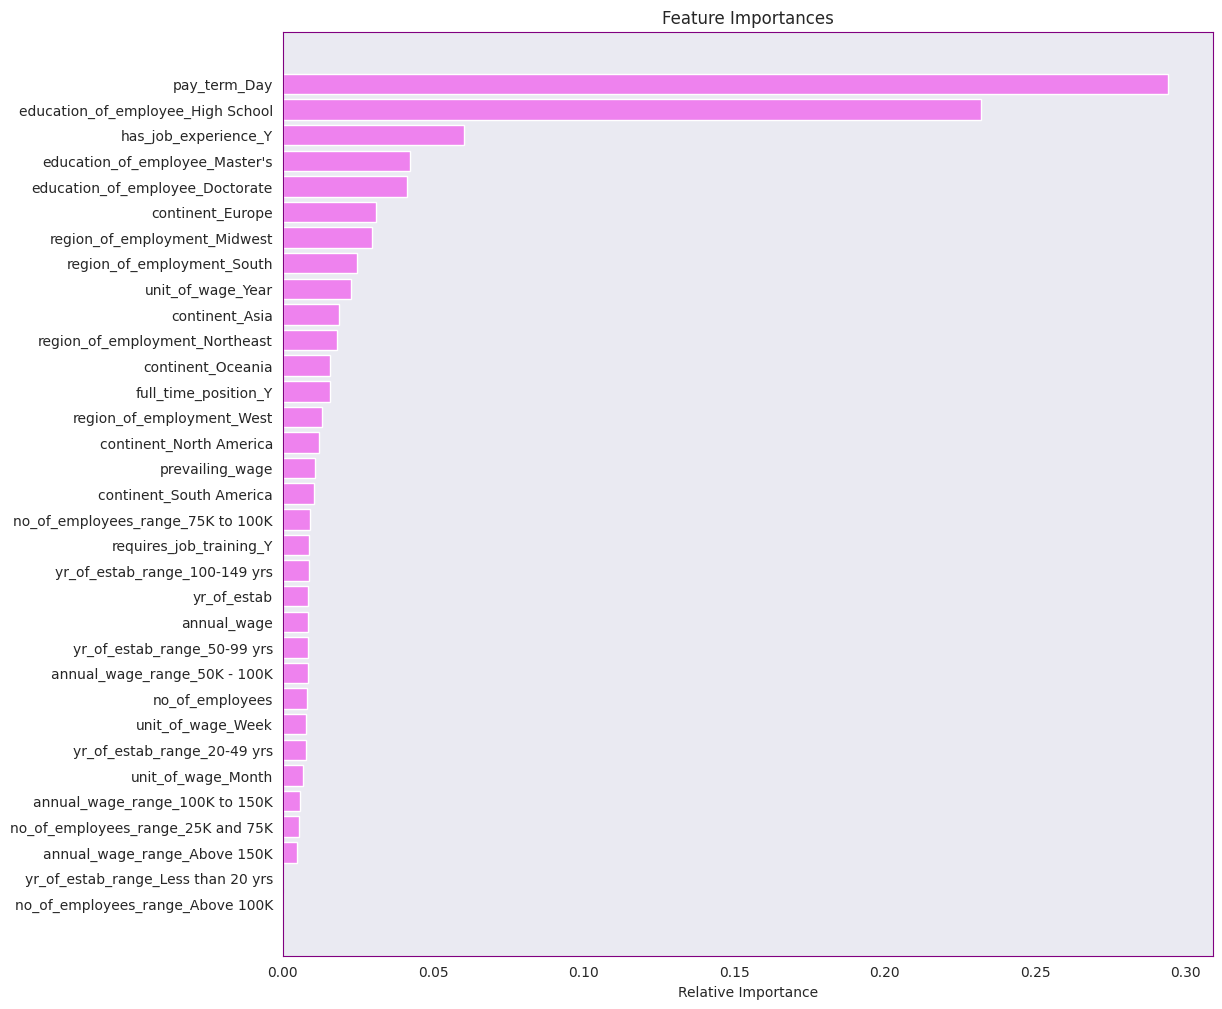

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
pay_term_Day                      0.2943
education_of_employee_High School 0.2319
has_job_experience_Y              0.0603
education_of_employee_Master's    0.0422
education_of_employee_Doctorate   0.0415
continent_Europe                  0.0310
region_of_employment_Midwest      0.0297
region_of_employment_South        0.0248
unit_of_wage_Year                 0.0226
continent_Asia                    0.0189


Pay term moved up to the most important feature for this model. <br>
Education of employee in High School was moved to the second important feature. <br>
Only 31 features were deemed important.<br>
These are the same top 4 features in all the models so far.

##  Will tuning the hyperparameters improve the model performance?

##Tuned model comparison

In [ ]:
# defining list of models
models = [dt_tuned, bag_tuned, rf_tuned, abc_tuned, gbc_init,  gbc_tuned, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_score_train = []
F1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],4))
    acc_test.append(np.round(j[1],4))
    recall_train.append(np.round(j[2],4))
    recall_test.append(np.round(j[3],4))
    precision_train.append(np.round(j[4],4))
    precision_test.append(np.round(j[5],4))
    F1_score_train.append(np.round(j[6],4))
    F1_score_test.append(np.round(j[7],4))

In [ ]:
# Set the display format to show 4 decimal places
pd.options.display.float_format = '{:.4f}'.format

comparison_frame = pd.DataFrame({'Model':['Decision Tree Tuned',
                                          'Bagging Tuned',
                                          'Random Forest Tuned',
                                          'AdaBoost Tuned',
                                          'Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned',
                                          'XGBoost Tuned'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision':precision_test,
                                          'Train_F1_score': F1_score_train,
                                          'Test_F1_score': F1_score_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_score,Test_F1_score
0,Decision Tree Tuned,0.7307,0.7274,0.9071,0.9024,0.7452,0.7441,0.8182,0.8156
1,Bagging Tuned,0.9885,0.7191,0.9958,0.8498,0.9872,0.7587,0.9915,0.8017
2,Random Forest Tuned,0.7668,0.7445,0.8975,0.8779,0.7845,0.7713,0.8372,0.8211
3,AdaBoost Tuned,0.7289,0.7250,0.9129,0.9063,0.7412,0.7403,0.8182,0.8149
4,Gradient Boosting with init=AdaBoost,0.7574,0.7483,0.8802,0.8687,0.7834,0.7797,0.8290,0.8218
5,Gradient Boosting Tuned,0.7549,0.7492,0.8786,0.8688,0.7816,0.7806,0.8273,0.8223
6,XGBoost Tuned,0.6921,0.6840,0.9997,0.9951,0.6846,0.6801,0.8127,0.8080


* Decison Tree Tuned model seems to be less overfitted and the model is performing equally well on the train and test dataset . Minimum difference between the two.<br>
* Bagging Tuned model is showing overfitting. Showing 99 - 100% for the train accuracy, recall, precision and F1 score. <br>
* Random Forest Tuned model seems to be less overfitted and the model is performing equally well on the train and test dataset . Minimum difference between the two.<br>
* AdaBoost Tuned model seems to be less overfitted and the model is performing equally well on the train and test dataset . Minimum difference between the two.<br>
* Gradient Boosting with init=AdaBoost model is performing equally well on the train and test dataset . Minimum to no difference between the two.<br>
* Gradient Boosting Tune model is performing equally well on the train and test dataset . Minimum to no difference between the two.<br>
* XGBoost Tuned model is showing overfitting. Showing 100% for the train recall and 100% on test recall. The chance of it always being correct is unlikely. <br>

* Best performing model is Gradient Boosting Tuned of the tuned models. There is only a 3.12% difference in the Decison Tree and Gradient Boosting model in Recall with Decision Tree performing better, however Gradient Boosting performs better in Accuracy, Precision and F1 score. <br>
* XGBooosting has a higher Recall percentage but its 99.51% demonstrates overfitting.

## Model Performance Comparison and Conclusions

In [ ]:
# defining list of models
models = [decisiontree, dt_tuned, bagging, bag_tuned, ranfor, rf_tuned, abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_score_train = []
F1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],4))
    acc_test.append(np.round(j[1],4))
    recall_train.append(np.round(j[2],4))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],4))
    precision_test.append(np.round(j[5],4))
    F1_score_train.append(np.round(j[6],4))
    F1_score_test.append(np.round(j[7],4))

In [ ]:
# Set the display format to show 4 decimal places
pd.options.display.float_format = '{:.4f}'.format

comparison_frame = pd.DataFrame({'Model':['Decision Tree', 'Decision Tree Tuned',
                                          'Bagging Classifier', 'Bagging Tuned',
                                          'Random Forest', 'Random Forest Tuned',
                                          'AdaBoost with default paramters', 'AdaBoost Tuned',
                                          'Gradient Boosting with default parameters', 'Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision':precision_train,
                                          'Test_Precision':precision_test,
                                          'Train_F1_score': F1_score_train,
                                          'Test_F1_score': F1_score_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_score,Test_F1_score
0,Decision Tree,1.0000,0.6678,1.0000,0.7500,1.0000,0.7510,1.0000,0.7516
1,Decision Tree Tuned,0.7307,0.7274,0.9071,0.9000,0.7452,0.7441,0.8182,0.8156
2,Bagging Classifier,0.9851,0.6982,0.9864,0.7700,0.9913,0.7750,0.9888,0.7738
3,Bagging Tuned,0.9885,0.7191,0.9958,0.8500,0.9872,0.7587,0.9915,0.8017
4,Random Forest,0.9999,0.7236,1.0000,0.8400,0.9999,0.7665,1.0000,0.8030
5,Random Forest Tuned,0.7668,0.7445,0.8975,0.8800,0.7845,0.7713,0.8372,0.8211
6,AdaBoost with default paramters,0.7390,0.7340,0.8905,0.8800,0.7600,0.7603,0.8201,0.8153
7,AdaBoost Tuned,0.7289,0.7250,0.9129,0.9100,0.7412,0.7403,0.8182,0.8149
8,Gradient Boosting with default parameters,0.7568,0.7484,0.8801,0.8700,0.7829,0.7803,0.8286,0.8217
9,Gradient Boosting with init=AdaBoost,0.7574,0.7483,0.8802,0.8700,0.7834,0.7797,0.8290,0.8218


* Decison Tree Tuned model seems to be less overfitted than the original model. The model is performing equally well on the train and test dataset . Minimum difference between the two.<br>
* Bagging Tuned model is showing the same overfitting that is showing on the original model. Both are showing 99-100% for all the percentages; Accuracy, Recall, Precision, and F1 score. <br>
* Random Forest Tuned model seems to be less overfitted than the original model. The model is performing equally well on the train and test dataset . Minimum difference between the two.<br>
* AdaBoost Tuned model seems to be perform a little worse than the original on everything but Recall which improved when it was tuned. Both models are performing equally well on the train and test dataset . Minimum difference between the two.<br>
* Gradient Boosting with init=AdaBoost model, Gradient Boosting Tuned and Gradient Boosting Classifier model are all performing about the same. Differences are all less than 1%. All 3 models are performing equally well on the train and test dataset . Minimum to no difference between the two.<br>
* XGBoost Tuned model is showing overfitting. Showing 99.97% for the train recall and 99.51% on test recall. The chance of it almost always being correct is unlikely. The Tuned model is performing worse than the original. <br>

* Best performing model is Gradient Boosting Tuned. There is only a 4% difference in the Decison Tree and Gradient Boosting Tuned model in Recall with Decision Tree performing better, however Gradient Boosting performs better in Accuracy, Precision and F1 score. <br>
* The second best models based on recall is AdaBoost Tuned and Decision Tree Tuned. Their recall score is ~90-91%. <br>
* XGBooosting has a higher Recall percentage but its 99.51% demonstrates overfitting.

* Choosing any of the Gradient Boosting models will help OFLC:
    * Facilitate the process of visa approvals.
    * Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
education_of_employee_High School 0.2956
has_job_experience_Y              0.1677
pay_term_Day                      0.0925
education_of_employee_Master's    0.0868
education_of_employee_Doctorate   0.0754
continent_Europe                  0.0651
prevailing_wage                   0.0453
region_of_employment_Midwest      0.0400
unit_of_wage_Year                 0.0297
continent_North America           0.0197


In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
education_of_employee_High School 0.6000
has_job_experience_Y              0.2267
pay_term_Day                      0.1467
education_of_employee_Master's    0.0267
no_of_employees                   0.0000
unit_of_wage_Year                 0.0000
full_time_position_Y              0.0000
yr_of_estab_range_100-149 yrs     0.0000
yr_of_estab_range_50-99 yrs       0.0000
yr_of_estab_range_20-49 yrs       0.0000


In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(dt_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

'The importance of features in the tree building \n(The importance of a feature is computed as the (normalized) total \nreduction of the criterion brought by that feature.)'

                                     Imp
education_of_employee_High School 0.3969
pay_term_Day                      0.2176
has_job_experience_Y              0.1644
continent_Europe                  0.0666
region_of_employment_Midwest      0.0536
education_of_employee_Master's    0.0463
education_of_employee_Doctorate   0.0399
continent_North America           0.0146
yr_of_estab_range_100-149 yrs     0.0000
yr_of_estab_range_50-99 yrs       0.0000


All 3 of the models are showing the same top 3 features, however each are showing them at different percent levels of importance.

<Figure size 3000x1000 with 0 Axes>

[Text(0.6833333333333333, 0.9166666666666666, 'node #0\neducation_of_employee_High School <= 0.5\ngini = 0.443\nsamples = 17812\nvalue = [5912, 11900]\nclass = y[1]'),
 Text(0.5, 0.75, 'node #1\npay_term_Day <= 0.5\ngini = 0.404\nsamples = 15433\nvalue = [4335, 11098]\nclass = y[1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'node #3\nhas_job_experience_Y <= 0.5\ngini = 0.376\nsamples = 14211\nvalue = [3561, 10650]\nclass = y[1]'),
 Text(0.2, 0.4166666666666667, 'node #5\ncontinent_Europe <= 0.5\ngini = 0.461\nsamples = 5672\nvalue = [2049, 3623]\nclass = y[1]'),
 Text(0.13333333333333333, 0.25, 'node #7\nregion_of_employment_Midwest <= 0.5\ngini = 0.481\nsamples = 4804\nvalue = [1928, 2876]\nclass = y[1]'),
 Text(0.06666666666666667, 0.08333333333333333, 'node #9\ngini = 0.495\nsamples = 3786\nvalue = [1700, 2086]\nclass = y[1]'),
 Text(0.2, 0.08333333333333333, 'node #10\ngini = 0.348\nsamples = 1018\nvalue = [228, 790]\nclass = y[1]'),
 Text(0.26666666666666666, 0.25, 'node #8\

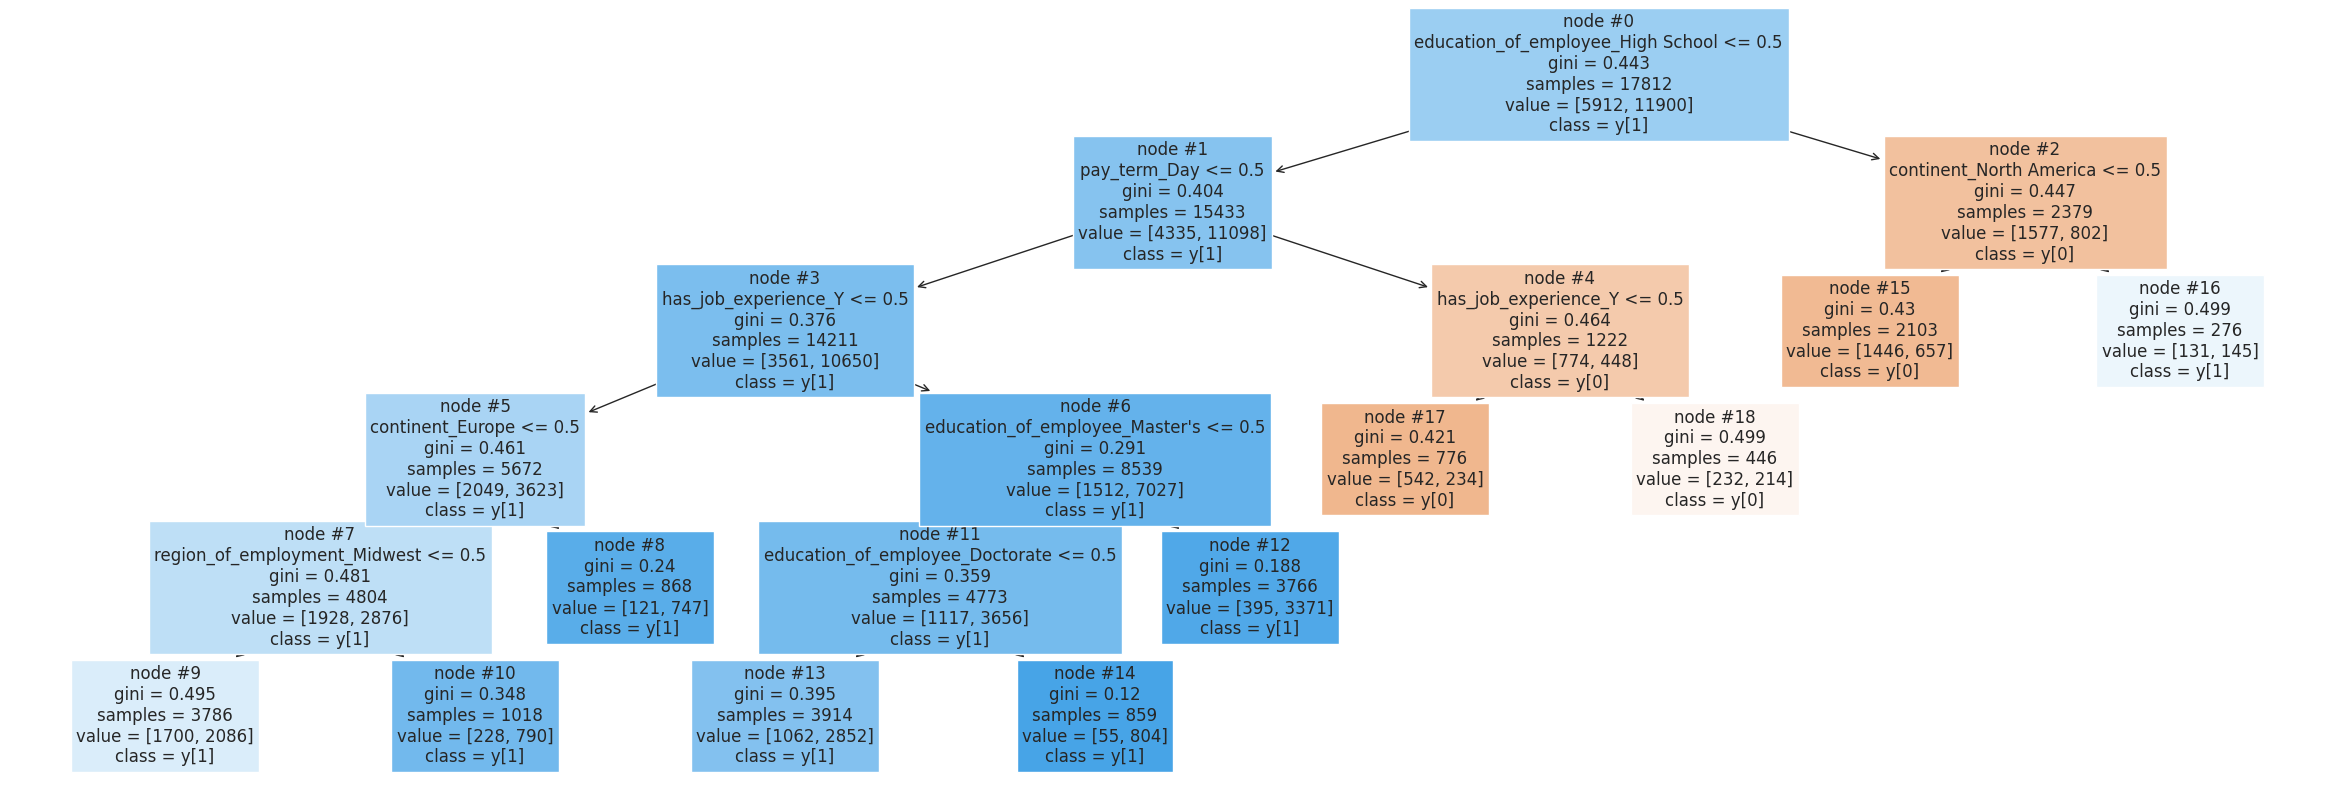

In [ ]:
#create visualization of tuned decision-tree model
feature_names = list(X.columns)
plt.figure(figsize=(30,10))
tree.plot_tree(dt_tuned,feature_names=feature_names,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

## Actionable Insights and Recommendations

**Insights**

For the Office of Foreign Labor Certification (OFLC), the three most critical components for pre-screening an applicant are:

* Education level
  * For jobs requiring a high school diploma, applicants may face a higher likelihood of denial. In contrast, applications for positions requiring a master's degree or doctorate are more likely to be approved.

* Prior job experience
  * Applicants without previous job experience are more likely to be denied compared to those with experience

* Pay_term_day
  * Applicants paid based on a daily or hourly prevailing wage are more likely to be denied compared to those receiving an annual prevailing wage.
  * This feature was added based on my interpretation of the data. The hourly prevailing wage appears to be calculated differently. The prevailing
    wage appears to be based on daily amounts vs the rest which appear to be based on annual amounts.


The top 3 features are related. A position that only requires a high school diploma, most likely requires little to no experience. These type of positions also usually pay by the hour.



**Recommendations**


To optimize the allocation of limited resources in screening applications, the OFLC can:

* Prioritize applications by sorting them based on the level of education, giving precedence to higher levels of education during the review process.
* Focus on applications with previous job experience by sorting and reviewing those with relevant experience first.
* For hourly and annual wage job applications, categorize them accordingly and sort each group by the prevailing wage. Review applications for salaried positions starting from the highest to the lowest wage.

These steps aim to streamline the evaluation process and enhance efficiency in resource utilization.<br>
<br>

Additonal information can be obtained about the employer and employees:

* Years of experience
* Industry of the company
* Required hours of work per week
* Hourly pay rate
* Age of the applicant
* Whether the applicant has family living in the US
* Background check/security clearance status
* Company turnover rate
* Duration of the job offered by the company

Incorporating this additional information could improve the prioritization of applicants based on certification/denial percentages derived from the model. <br>
<br>


The following information was reviewed but found to have minimal impact on the approval of a visa application across all models:

* Whether job training is required
* Age of the company
* Whether the position is full-time

These details may be omitted from the information obtained from the applicant.





In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/Python_Course/Project_5/DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Python_Course/Project_5/DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb to html
[NbConvertApp] Writing 4375860 bytes to /content/drive/MyDrive/Python_Course/Project_5/DSBA_Project_ET_EasyVisa_Fullcode_V1.html
